<div style="display:flex; border-bottom:4px solid gray; background-color: white; padding: 10px;">
    <div>
        <h2 style="margin:10px 0px 0px 0px;">Design Workshop - Fall 2022</h2>
        <h4 style="margin:10px 10px 10px 0px;"><i>Artificial Intelligence - Data Science</i></h4>
    </div>
    <img src="https://raw.githubusercontent.com/JABE22/Image/main/Logos/logo_ural-federal-university.png" style="width:300px; height:150px; margin-right: 25px;" align='right' />
</div>
<h4 style="margin-top:10px; text-align:right; font-size: 20px; margin-right: 25px;"> Jarno Matarmaa - 01.2023 - Version 5.0-vs_desktop_f</h4>

# Sport Activity Classification using Time Series Analysis

---

**CHANGE LOG:**
- [21.01.2023] Category distribution visualization fixed from vertical overlapping to a horizontal stacked bar plot among categories and train and test data splits.
- [13.12.2022] MUSE multivariate classifier applied with great success. For now, I did not find other working solutions. E.g., HIVECOTEV2 did not finished in 120 minutes, therefore will be rejected. MiniRocketMultivariate was complicated (it is actually only a transformer)
- [13.12.2022] Additional analysis for three dimensional nested data structure integrated
- **[10.12.2022] Tried to apply s = (s - s.mean())/(s.std()) for standardization with no success (single and double standardization using in addition StandardScaler, existing method). Results were basically much worse, but some models performed still quite good. e.g., (STSF 0.87) but TSF only 0.59. Could it be because of additional built in standardization. I returned back to the original.
- [08.12.2022] Best model classification in larger data space inserted for the model `SupervisedTimeSeriesForest()`
- [08.12.2022] Inserted: Predictions will be stored for each model in `classify()` function and will be saved to the file when executing
- [29.11.2022] Segmentation function fixed -> There was wrong labeling problem. Previously made conclusions about the results of segmentation was therefore wrong. Segmentation does not affect results significantly, the only problem migth be computational resources.
- [11.11.2022] New metrics (*MSE, F1, ROC-AUC*) inserted to the result table
- [11.11.2022] Table of contents inserted to the file for convenience
- [11.11.2022] Progress bar fixed. There were pink background color and problem with printing in the `tqdm` loop. (New progress bar was printed out in every progress)
- [10.11.2022] Pandas forward filling `fillna(method='ffill')` replaced by `interpolate(method='linear', limit_direction='both')`
- [10.11.2022] TSA in one dimensional univariate data implemented for Heart Rate (Test Section)
- [08.11.2022] Best score and variance among iterations inserted to the result table
- [08.11.2022] Classification uses now 3 iterations in order to begin tackle score variance problem
- [04.11.2022] Code cleaned and clarified by creating functions to decrease redundancy and to improve usability
- [04.11.2022] Global variables are now capitalized for clarity
- [03.11.2022] Replaced zero filling for missing values using `DataFrame.fillna(method='ffill')`. List of options for replacing:
`method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}`
- [01.11.2022] Data initialization function has now form `init_data(seq_start=0, seq_end=100, nest=True, tab=True, std=True)`
- [01.11.2022] More models inserted to the analysis, Gradient Boosting etc.
- [01.11.2022] A suggestion, that data standardization does not affect the results of sktime models was mistake. All models performed over 92 percent after moving to standard data. Original feature classification now used only for sklearn tree based models.
- [26.10.2022] Data initialization function created. All data variables (train/test splits) can be reseted using `init_data(nest=True, tab=True, std=True)` 
- [20.10.2022] Manual data splitting replaced by train_test_split function. This will be the solution for data shuffling and for easier further data processing
- [19.10.2022] Probably SKTIME classifiers standardize data, because no effect when feeding standard data to models
- [19.10.2022] Data augmentation using simple segmentation seems not to be working
- [19.10.2022] Standard data fixed most of the problems when using SKLEARN classifiers (results improved 20-30%)
- [19.10.2022] Test section inserted into the end of the file for separate (draft analysis)
- [19.10.2022] Data augmentation using segmentation *(equal length sequencies without excluding any data)*
- [19.10.2022] New classification models applied
- [12.10.2022] 'None' value problem solved => replacing with zeros => FIND OPTIMAL WAY
- [12.10.2022] Datetime feature set as index
- [12.10.2022] Optimize class distribution among train and test data (stratify=y) have to be done manually
- [12.10.2022] Checked that dataset construction works properly and labels are added correctly
- [12.10.2022] Validate data -> excluded too short activities, time series length set according to the minimum
- [12.10.2022] Preliminary classification methods applied
- [12.10.2022] Data import, brief data introduction, and preliminary multivariate dataset construction accomplished

**TODO:**
- [10.12.2022] From the sample data visualization we can perceive that all activities do not have one second time interval, that HAS TO BE SOLVED
- [26.10.2022] Build Column Ensemble classifier (Wait for best classifier analysis)
- [21.9.2022] Feature Engineering (There might be some built in feature extraction methods in *sktime*)

**QUESTIONS:**

- **[08.12.2022]** How to find original indexes for the misclassified cases, and further, actual data for the corresponding activity in the original dataset? What is the most convenient way to do it?

TQDM Progress bar: "*The pink background means that the output goes to sys.stderr. To have white background use tqdm parameter file*"

https://stackoverflow.com/questions/71477963/how-do-i-set-default-progress-bar-color-and-background-colour-for-tqdm

---

<a id="CT"></a> <br>
## I - Table of Contents

#### [1 - Data import and preview](#1)
* [1A - Libraries](#1A)
* [1B - Load the Time Series Data](#1B)
* [1C - Explore the Data](#1C)

#### [2 - Dataset construction for TSA](#2)
* [2A - Data Preprocessing](#2A)
* [2B - Train-Test data splitting *(stratified by y)*](#2B)
* [2C - Data Standardization *(for visualization)*](#2C)

#### [3 - Preliminary TSA Classification (SKTIME, SKLEARN)](#3)
* [3A - Libraries and functions](#3A)
* [3B - Data setup](#3B)
* [3C - SKTime classifiers](#3C)
* [3D - SKLearn Classifiers](#3D)
* [3E - Combined Classifier test](#3E)

#### [4 - Test Section](#4)
* [4A - Pipeline with data transformers](#4A)
* [4B - TSA in Heart Rate](#4B)
* [4C - Hyperparameter tuning test for single models](#4C)
* [4D - ROC AUC score for multiclass classification](#4D)
* [4E - Data selection function](#4E)
* [4F - Column based classification (Tests for column ensemble)](#4F)

#### [5 - Code Archive](#5)
* [5A - Data split function (stratified y)](#5A)
* [5B - Plot Functions](#5B)

---

## II - File navigation instructions

From the content table you can navigate quickly to any first or second level header as normally

In the beginning of every header and subheader there is triangle "▲"
- In top level headers (1-5), you can use it to navigate back to content table
- For second level headers (A-X), you can use it to navigate back to first level header

Example:

- First level header: ▲ 1 - Data import and preview
- Second level header: ▲ 1A - Libraries

---

<a id="1"></a> <br>
## [▲](#CT) 1 - Data import and preview

<a id="1A"></a> <br>
### [▲](#1) 1A - Libraries

In [53]:
%pip install sktime
%pip install directory-structure

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [54]:
# System tools
import os
import sys
# File structure
from directory_structure import Tree
# Data manipulation tools
import pandas as pd
import numpy as np
import math
# Datetime
import datetime
# Data visualization tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
# Seaborn setup
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [55]:
run_start = datetime.datetime.now()

<a id="1B"></a> <br>
### [▲](#1) 1B - Load the Time Series Data

If you have only Garmin TCX format data, you may use this code to transform it into CSV format.

TCX to CSV data parser tool for set of files: https://github.com/JABE22/DesignWorkshopProject

#### File path setup

- Data is supposed to be in the folder path `CSVDATA/SET1/`
- Global variables setup `DATA_PATH` and `TARGET_FILENAME`

In [56]:
DATA_PATH = "data/CSVDATA/SET1/"

In [57]:
path = Tree(DATA_PATH, absolute=False)
print(path)

📂 SET1
|_📄 activity_7125859489.csv
|_📄 activity_5535921125.csv
|_📄 activity_5279934923.csv
|_📄 activity_6115746501.csv
|_📄 activity_7182390850.csv
|_📄 activity_5502157448.csv
|_📄 activity_6963362145.csv
|_📄 activity_5929704509.csv
|_📄 activity_5399902984.csv
|_📄 activity_6717136797.csv
|_📄 activity_7277704255.csv
|_📄 activity_5960571858.csv
|_📄 activity_7086565392.csv
|_📄 activity_6844632063.csv
|_📄 activity_7362496639.csv
|_📄 activity_6297668429.csv
|_📄 activity_5967477333.csv
|_📄 activity_5094663967.csv
|_📄 activity_5375996342.csv
|_📄 activity_5385456237.csv
|_📄 activity_5152826129.csv
|_📄 activity_5576093303.csv
|_📄 activity_7532913217.csv
|_📄 activity_5149338622.csv
|_📄 activity_5207685960.csv
|_📄 activity_5482151323.csv
|_📄 activity_6830729188.csv
|_📄 activity_6801507878.csv
|_📄 activity_5232209928.csv
|_📄 activity_5173841790.csv
|_📄 activity_6240350076.csv
|_📄 activity_5941996217.csv
|_📄 activity_7056221330.csv
|_📄 activity_7052511210.csv
|_📄 activity_5640579012.csv
|_📄 activity_

In [58]:
entries = sorted(os.listdir(DATA_PATH))
len(entries)

298

In [59]:
np.sort(entries)[-1]

'activity_types.csv'

In [60]:
TARGET_FILENAME = "activity_types.csv"

<a id="1C"></a> <br>
### [▲](#1) 1C - Explore the Data

In [61]:
df_ac1 = pd.read_csv(DATA_PATH + entries[0], delimiter=';', index_col=0)
df_ac2 = pd.read_csv(DATA_PATH + entries[1], delimiter=';', index_col=0)
df_ac1.shape, df_ac2.shape

((2607, 8), (6815, 8))

In [62]:
df_ac1

Latitude  Longitude    Altitude      Distance  \
Datetime                                                                    
2020-05-22 16:02:26+00:00  61.432525  23.803976  124.800003      0.000000   
2020-05-22 16:02:27+00:00  61.432525  23.803976  124.800003      0.000000   
2020-05-22 16:02:32+00:00  61.432408  23.804176  124.800003     26.990000   
2020-05-22 16:02:36+00:00  61.432521  23.804282  124.800003     48.580002   
2020-05-22 16:02:38+00:00  61.432550  23.804260  124.800003     49.779999   
...                              ...        ...         ...           ...   
2020-05-22 18:14:44+00:00  61.432475  23.804577  124.800003  45934.988281   
2020-05-22 18:14:52+00:00  61.432459  23.804565  124.800003  45937.031250   
2020-05-22 18:14:55+00:00  61.432468  23.804571  124.800003  45937.851562   
2020-05-22 18:14:57+00:00  61.432468  23.804566  124.800003  45937.960938   
2020-05-22 18:15:02+00:00  61.432517  23.804574  124.800003  45942.738281   

                           HeartRate  Speed Cadence Watts  
Datetime                                                   
2020-05-22 16:02:26+00:00         79  0.653    None  None  
2020-05-22 16:02:27+00:00         77  0.653    None  None  
2020-05-22 16:02:32+00:00         76  0.000    None  None  
2020-05-22 16:02:36+00:00         75  0.000    None  None  
2020-05-22 16:02:38+00:00         82  0.000    None  None  
...                              ...    ...     ...   ...  
2020-05-22 18:14:44+00:00         89  0.000    None  None  
2020-05-22 18:14:52+00:00         86  0.000    None  None  
2020-05-22 18:14:55+00:00         90  0.000    None  None  
2020-05-22 18:14:57+00:00         86  0.000    None  None  
2020-05-22 18:15:02+00:00         86  0.457    None  None  

[2607 rows x 8 columns]

In [63]:
df_ac1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2607 entries, 2020-05-22 16:02:26+00:00 to 2020-05-22 18:15:02+00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   2607 non-null   float64
 1   Longitude  2607 non-null   float64
 2   Altitude   2607 non-null   float64
 3   Distance   2607 non-null   float64
 4   HeartRate  2607 non-null   int64  
 5   Speed      2607 non-null   float64
 6   Cadence    2607 non-null   object 
 7   Watts      2607 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 183.3+ KB


In [64]:
df_ac2

Latitude  Longitude    Altitude      Distance  \
Datetime                                                                    
2020-05-25 15:58:03+00:00  61.432712  23.803714  128.800003      1.930000   
2020-05-25 15:58:04+00:00  61.432697  23.803715  128.800003      3.660000   
2020-05-25 15:58:05+00:00  61.432684  23.803711  128.800003      5.030000   
2020-05-25 15:58:06+00:00  61.432662  23.803709  128.800003      7.410000   
2020-05-25 15:58:07+00:00  61.432642  23.803704  129.199997      9.650000   
...                              ...        ...         ...           ...   
2020-05-25 17:51:23+00:00  61.432319  23.803627  120.800003  30138.349609   
2020-05-25 17:51:24+00:00  61.432319  23.803627  120.800003  30138.349609   
2020-05-25 17:51:25+00:00  61.432319  23.803627  120.800003  30138.349609   
2020-05-25 17:51:26+00:00  61.432319  23.803627  120.800003  30138.349609   
2020-05-25 17:51:27+00:00  61.432319  23.803627  120.800003  30138.349609   

                           HeartRate  Speed Cadence Watts  
Datetime                                                   
2020-05-25 15:58:03+00:00         92  1.260    None  None  
2020-05-25 15:58:04+00:00         97  1.176    None  None  
2020-05-25 15:58:05+00:00         99  1.138    None  None  
2020-05-25 15:58:06+00:00         99  1.344    None  None  
2020-05-25 15:58:07+00:00        101  1.278    None  None  
...                              ...    ...     ...   ...  
2020-05-25 17:51:23+00:00        169  0.000    None  None  
2020-05-25 17:51:24+00:00        168  0.000    None  None  
2020-05-25 17:51:25+00:00        166  0.000    None  None  
2020-05-25 17:51:26+00:00        165  0.000    None  None  
2020-05-25 17:51:27+00:00        162  0.000    None  None  

[6815 rows x 8 columns]

In [65]:
df_ac2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6815 entries, 2020-05-25 15:58:03+00:00 to 2020-05-25 17:51:27+00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   6815 non-null   float64
 1   Longitude  6815 non-null   float64
 2   Altitude   6815 non-null   float64
 3   Distance   6815 non-null   float64
 4   HeartRate  6815 non-null   int64  
 5   Speed      6815 non-null   float64
 6   Cadence    6815 non-null   object 
 7   Watts      6815 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 479.2+ KB


#### Viualization for random time series samples

In [66]:
df_ac2.HeartRate.values

array([ 92,  97,  99, ..., 166, 165, 162])

In [67]:
df_ac1.index = pd.to_datetime(pd.Series(df_ac1.index))
df_ac2.index = pd.to_datetime(pd.Series(df_ac2.index))

**Sample A**

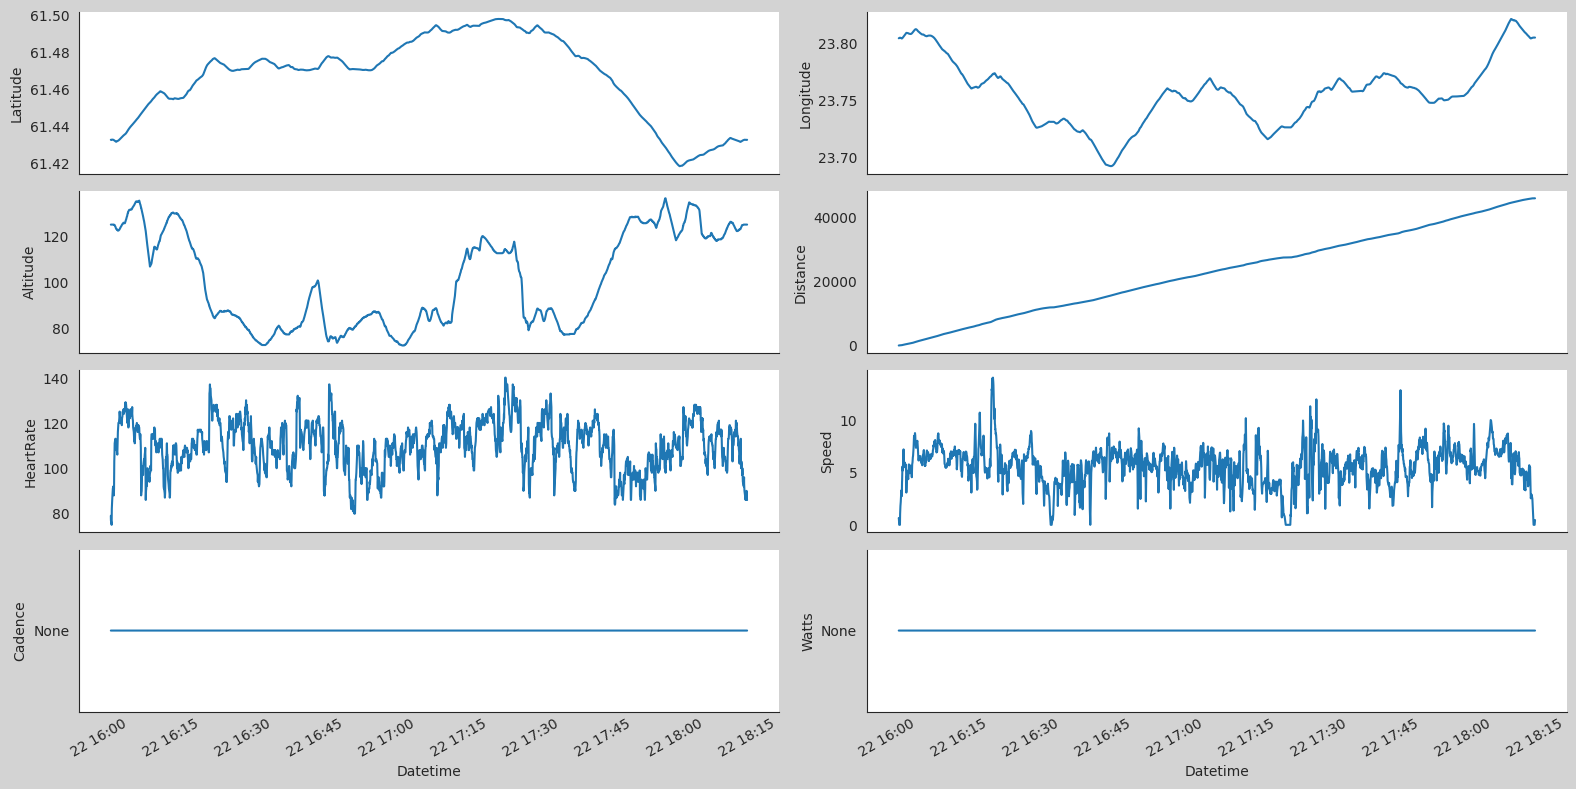

In [68]:
df_plot = df_ac1.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 8))
fig.patch.set_facecolor('lightgray')

for i, ax in enumerate(fig.axes):
    sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        
fig.tight_layout()
plt.show()

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

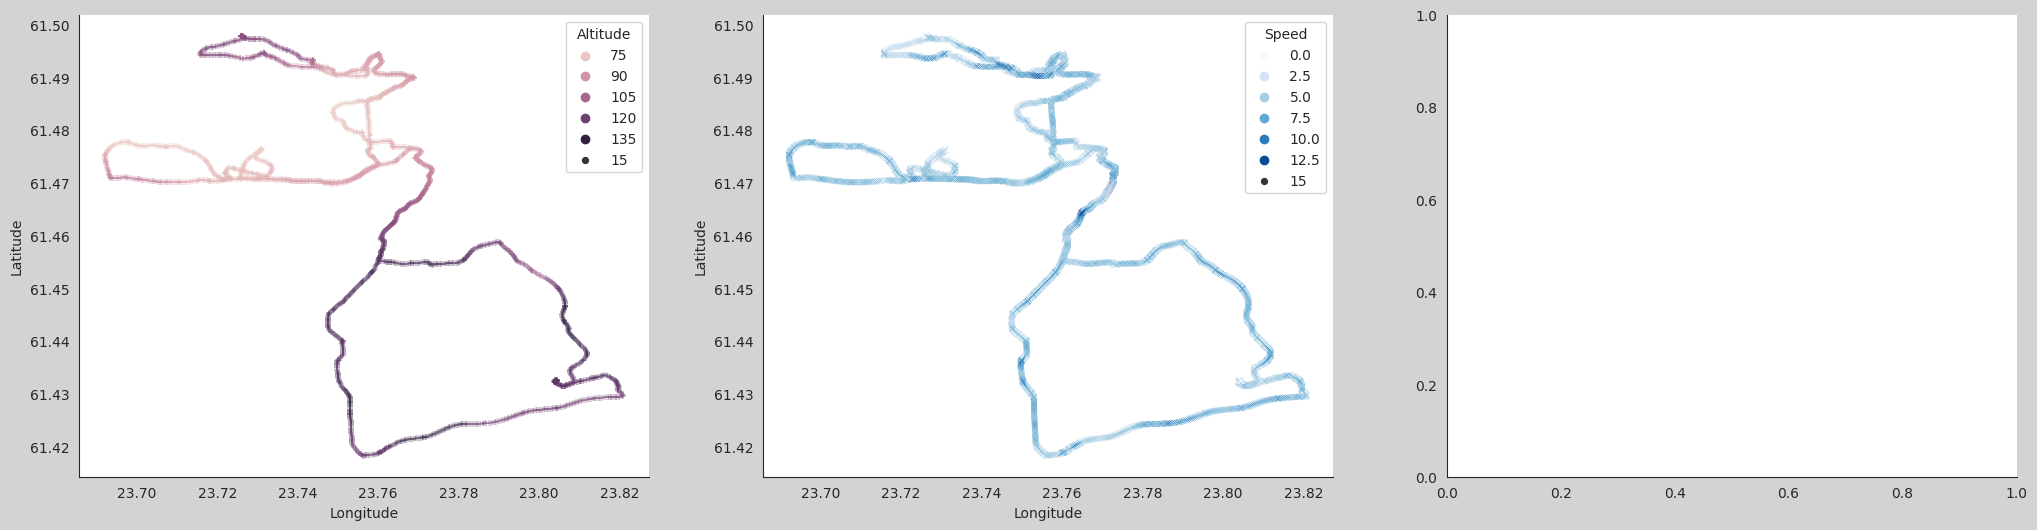

In [69]:
fig, ax = plt.subplots(1,3,figsize=(25, 6), facecolor='lightgray')
sns.scatterplot(data=df_ac1[['Altitude','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Altitude', size=15, marker='+', ax=ax[0])
sns.scatterplot(data=df_ac1[['Speed','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Speed', size=15, marker='x', palette='Blues', ax=ax[1])
#sns.scatterplot(data=df_ac1[['HeartRate','Longitude','Latitude']].reset_index(),
#             x='Longitude', y='Latitude', hue='HeartRate', size=15, marker='o', palette="rocket", ax=ax[2])

Text(0.5, 0, 'Speed')

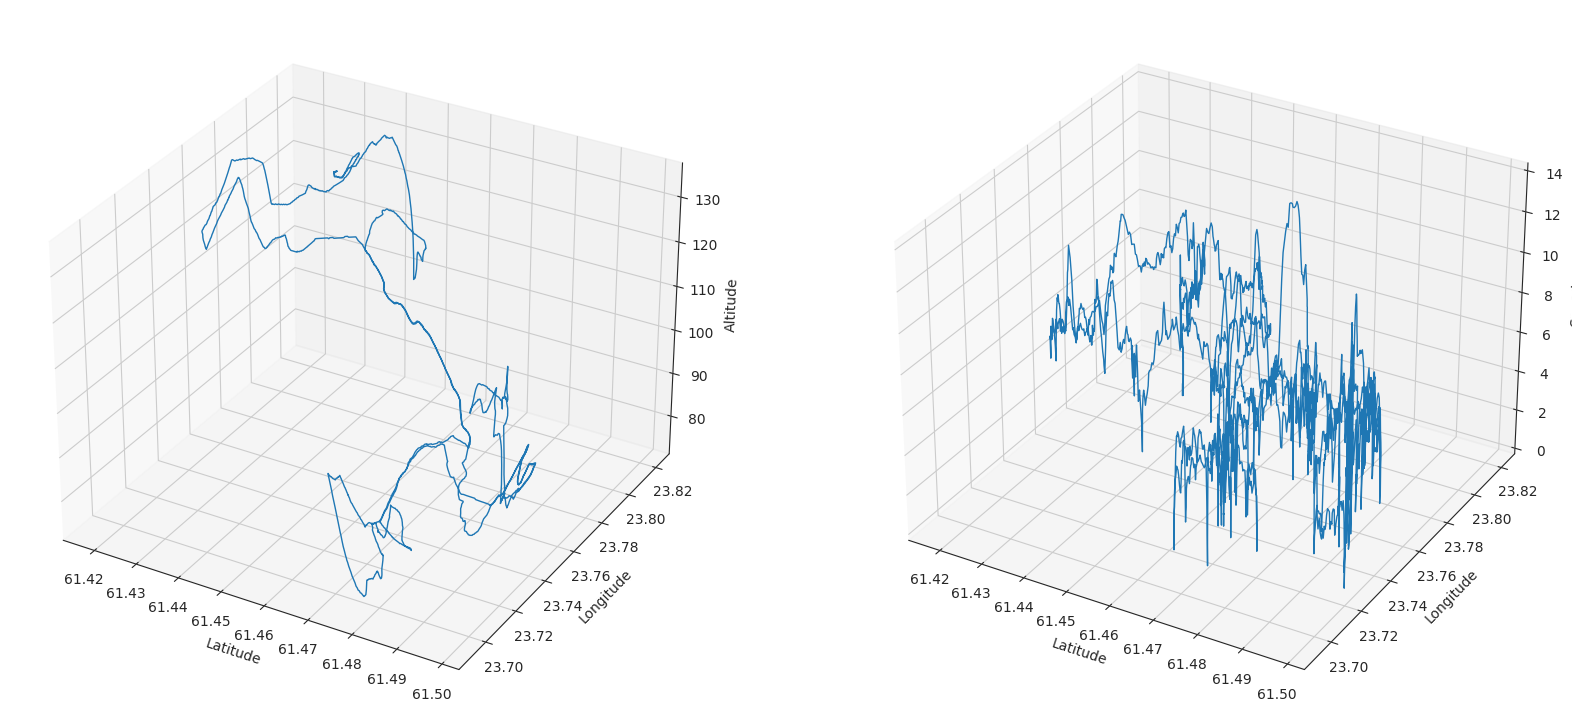

In [70]:
fig = plt.figure(figsize=(20,10), facecolor='white')
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot3D(df_ac1['Latitude'], df_ac1['Longitude'], df_ac1['Altitude'], lw=1)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_zlabel('Altitude')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot3D(df_ac1['Latitude'], df_ac1['Longitude'], df_ac1['Speed'], lw=1)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
ax2.set_zlabel('Speed')

**Sample B**

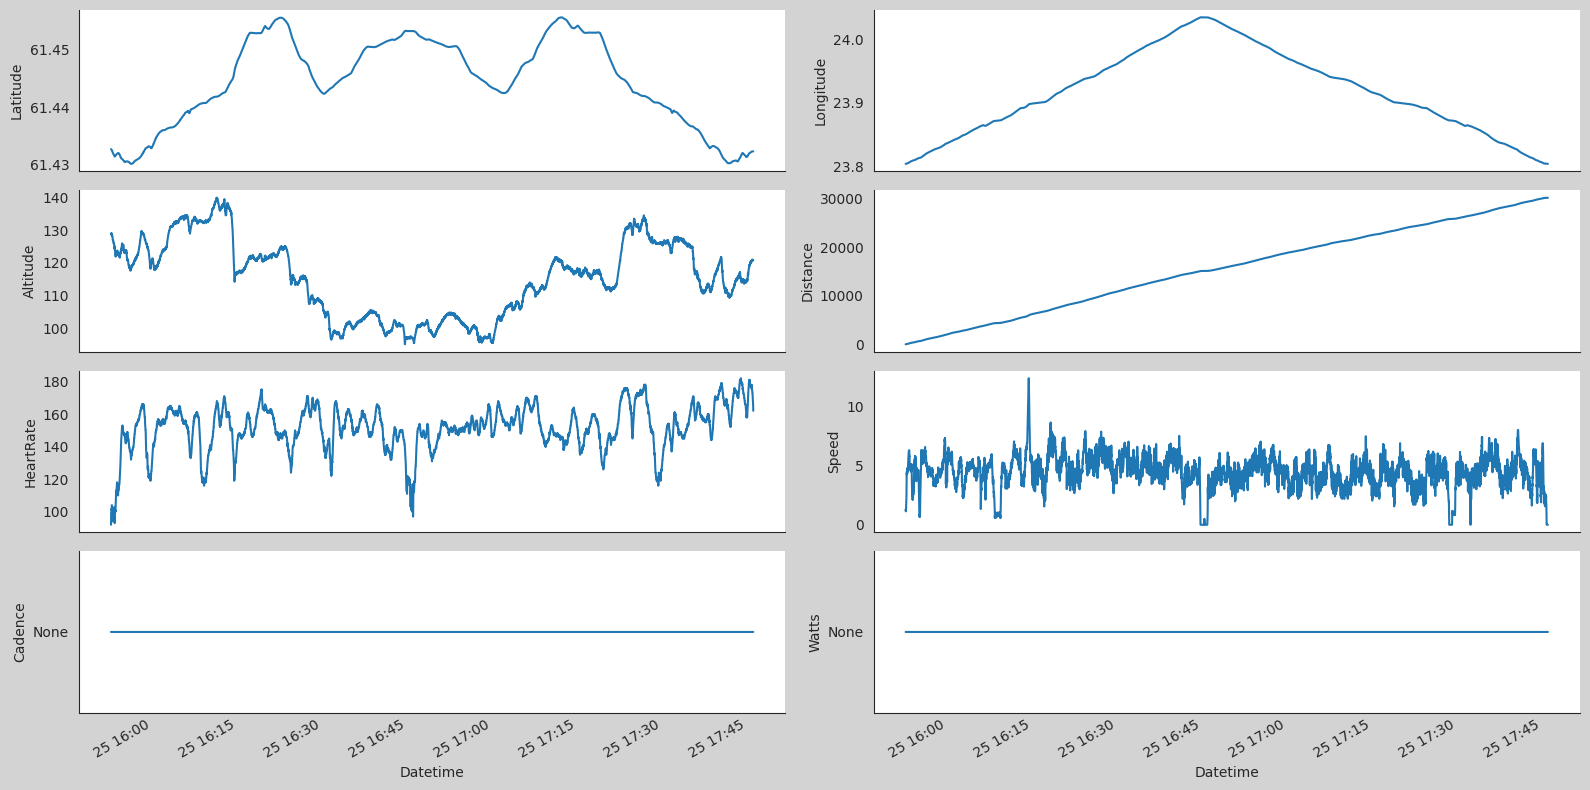

In [71]:
df_plot = df_ac2.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(16, 8))
fig.patch.set_facecolor('lightgray')

for i, ax in enumerate(fig.axes):
    sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
    ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        
fig.tight_layout()
plt.show()

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

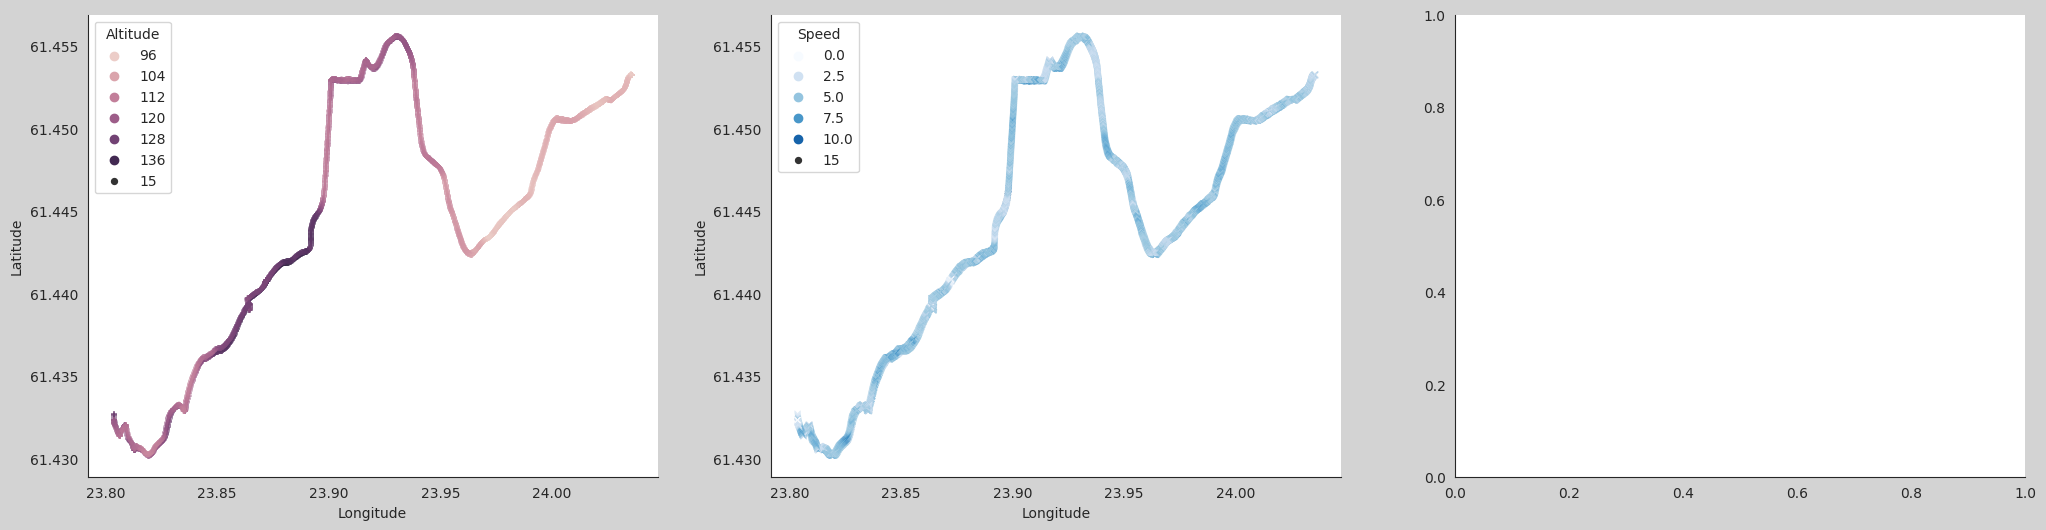

In [72]:
fig, ax = plt.subplots(1,3,figsize=(25, 6), facecolor='lightgray')
sns.scatterplot(data=df_ac2[['Altitude','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Altitude', size=15, marker='+', ax=ax[0])
sns.scatterplot(data=df_ac2[['Speed','Longitude','Latitude']].reset_index(),
             x='Longitude', y='Latitude', hue='Speed', size=15, marker='x', palette='Blues', ax=ax[1])
#sns.scatterplot(data=df_ac2[['HeartRate','Longitude','Latitude']].reset_index(),
#             x='Longitude', y='Latitude', hue='HeartRate', size=15, marker='o', palette='rocket', ax=ax[2])

Text(0.5, 0, 'Speed')

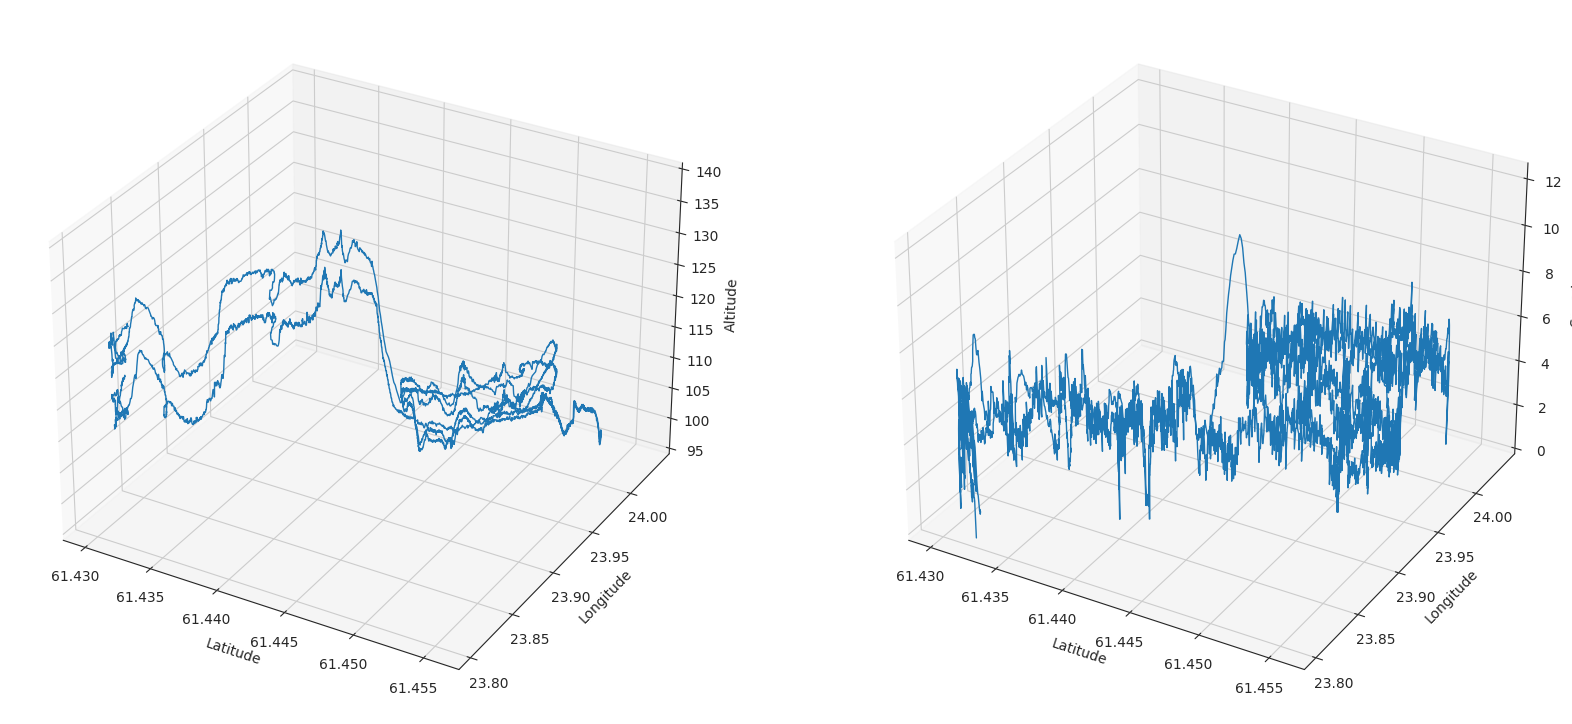

In [73]:
fig = plt.figure(figsize=(20,10), facecolor='white')
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot3D(df_ac2['Latitude'], df_ac2['Longitude'], df_ac2['Altitude'], lw=1)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_zlabel('Altitude')
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot3D(df_ac2['Latitude'], df_ac2['Longitude'], df_ac2['Speed'], lw=1)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
ax2.set_zlabel('Speed')

---

<a id="2"></a> <br>
## [▲](#CT) 2 - Dataset construction for TSA

<a id="2A"></a> <br>
### [▲](#2) 2A - Data Preprocessing

**Function to get filenames and target/label data**

In [74]:
'''
Ordering MUST BE ENABLED - Otherwise data labels in the target file will be confused!
'''
def get_entries_with_labels(data_path, target_file_name, ordering=True, info=False):
    entries = os.listdir(data_path)
    # Lets remove target file from the list
    entries.pop(entries.index(target_file_name))
    # If ordering selected in function call
    if ordering:
        entries = np.sort(entries).tolist()

    # Getting targets ( and removes it from the entries => entries.pop() )
    targets = pd.read_csv(data_path + target_file_name, delimiter=';', header=0)
    if info:
        print("Found " + str(len(entries)) + " files from the directory '" + data_path + "'")
        print("Found " + str(len(targets)) + " labels for the data from the file '" + target_file_name + "'")

    return (entries, targets)

**Set entries and targets**

In [75]:
ENTRIES, TARGETS = get_entries_with_labels(DATA_PATH, TARGET_FILENAME, info=True)

In [ ]:
TARGETS.head(5)

activity_name
0        Biking
1         Other
2        Biking
3        Biking
4         Other

#### Data Sequencing
- *Dealing with missing values in the same loop*
- *Some instructions how to deal with missing values*

https://www.projectpro.io/recipes/deal-with-missing-values-in-timeseries-in-python


**Functions for sequences**

Validation of pandas interpolation missing value filling method 

In [ ]:
df = pd.DataFrame([(np.nan, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (np.nan, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

df.interpolate(method='linear', limit_direction='both', axis=0)

a    b    c     d
0 NaN  2.0 -1.0   1.0
1 NaN  2.0 -2.0   5.0
2 NaN  3.0 -3.0   9.0
3 NaN  4.0 -4.0  16.0

Function to create sequencies from the raw files

In [ ]:
'''
This function reads CSV files from the given datapath. Files will be processed
using pandas dataframe. Then processed single files is combined into the same 
list of objects. This list of varying length sequences has the following value 
properties:

- All NaN values from the data is removed
- Gaps (missing values) are filled using linear forward/backward filling method

@data_path: Directory to read files from
@entries: Actual .csv format file names
@features: Features/column names to be used from the original files
'''
def get_sequences(data_path, entries, features, info=False):

    sequences = list()

    for entry in entries:
        # Read entry (csv file) to pandas dataframe for data processing
        df_data = pd.read_csv(data_path + entry, delimiter=';')
        
        # Set index to datatime object (one second intervals)
        df_data.index = pd.to_datetime(pd.Series(df_data.index))
        
        # Select features (given as parameter)
        df_data = df_data[features].copy()
        
        # Replace string type of 'None' to np.nan
        df_data.replace('None', np.nan, inplace=True)

        # Transform values to numeric format
        df_data = df_data.apply(pd.to_numeric, errors='ignore')
        
        # Fills nan values by context values (Some time series classifier models do not accept missing values)
        df_data.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
        # This fills gaps using last valid value (e.g., [2,3,6,nan,nan,8,7] => [2,3,6,6,6,8,7])
        #df_data.fillna(method='ffill', inplace=True) 
        
        # NOTE: Filling methods used above do not work if all values are 'nan'
        # Therefore, we replace rest of np.nan values using different method 
        df_data.fillna(0, inplace=True)
        
        # Take values and add them to the sequence list
        sequences.append(df_data.values.astype(float))

    if info:
        print("Created " + str(len(sequences)) + " sequences from " + str(len(entries)) + " entries")

    return np.asarray(sequences, dtype=object)

Function to analyze set of sequences

In [ ]:
def sequence_analysis(sequences, df, filter_status):    
    len_sequences = []
    for one_seq in sequences:
        len_sequences.append(len(one_seq))
    
    if df is None:
        df = pd.DataFrame(data=pd.Series(len_sequences).describe(), columns=[filter_status])
    else:
        df[filter_status] = pd.Series(len_sequences).describe()

    return df

**Create sequences with given features**

In [ ]:
# List of considered Features
FEATURES = ['HeartRate', 'Speed', 'Altitude']
SEQUENCES = get_sequences(DATA_PATH, ENTRIES, FEATURES, info=True)

Created 297 sequences from 297 entries


**About SEQUENCES**

Since the time series data is of varying length, we cannot directly build a model on this dataset. So how can we decide the ideal length of a series? There are multiple ways in which we can deal with it and here are a few ideas (I would love to hear your suggestions in the comment section):

- Pad the shorter sequences with zeros to make the length of all the series equal. In this case, we will be feeding incorrect data to the model
- Find the maximum length of the series and pad the sequence with the data in the last row
- Identify the minimum length of the series in the dataset and truncate all the other series to that length. However, this will result in a huge loss of data
- Take the mean of all the lengths, truncate the longer series, and pad the series which are shorter than the mean length

Let’s find out the minimum, maximum and mean length:

In [ ]:
seq_analysis_df = sequence_analysis(SEQUENCES, df=None, filter_status='Non-filtered')
seq_analysis_df.style.format(precision=3)

#### Data Filtering

Here the following global variables are set

`REJECT_INDEX`, `TARGET_FILTERED_IDX`, `SEQ_FILTERED`, `INDEX_DATA`

**Function for data sequence filtering**

In [ ]:
'''
Function filters data based on the limits given as a parameters.
For minimum sequence length limit (len_lim) shorter sequences will be rejected
For columns, limits are supposed to be mean values.

NOTE: This function seeks only for indexes, and it does not modify any global
variables
'''
def filter_values(sequences, len_lim=500, hr_lim=0, spd_lim=0, alt_lim=0):
    rm_index = []

    for i, s in zip(range(0,len(sequences)), sequences):
        hr_values = np.asarray(s[:,0], dtype=int)
        spd_values = np.asarray(s[:,1], dtype=float)
        alt_values = np.asarray(s[:,2], dtype=float)

        if len(s) < len_lim:
            rm_index.append(i)
        else:
            # For debug, print mean values
            #print(hr_values.mean(), spd_values.mean(), alt_values.mean())
            if hr_values.mean() <= hr_lim:
                rm_index.append(i)
            elif spd_values.mean() <= spd_lim:
                rm_index.append(i)
            elif alt_values.mean() <= alt_lim:
                rm_index.append(i)

    print(len(rm_index), rm_index)

    return rm_index


**Create filtered sequence list**

Get indexes for sequences which do not meet the requirements

In [ ]:
SEQUENCES.shape

(297,)

In [ ]:
REJECT_INDEX = filter_values(SEQUENCES, len_lim=500, hr_lim=100, spd_lim=1, alt_lim=1)

65 [2, 3, 5, 6, 7, 9, 13, 18, 19, 28, 29, 34, 37, 43, 45, 46, 58, 60, 61, 65, 67, 73, 89, 91, 93, 98, 105, 108, 109, 118, 119, 120, 122, 124, 131, 133, 134, 136, 138, 139, 146, 150, 159, 161, 179, 207, 208, 212, 218, 221, 226, 227, 228, 231, 232, 234, 236, 239, 248, 249, 250, 252, 272, 288, 290]


Let's store labels and original indexes to the data frame

In [ ]:
TARGET_FILTERED_IDX = [index for index in TARGETS.index if index not in REJECT_INDEX]
print('len() =', len(TARGET_FILTERED_IDX), TARGET_FILTERED_IDX)

len() = 232 [0, 1, 4, 8, 10, 11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 62, 63, 64, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 121, 123, 125, 126, 127, 128, 129, 130, 132, 135, 137, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, 229, 230, 233, 235, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 251, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 

Check labels

In [ ]:
TARGETS['activity_name'][TARGET_FILTERED_IDX].values

array(['Biking', 'Other', 'Other', 'Biking', 'Other', 'Biking', 'Running',
       'Other', 'Biking', 'Biking', 'Running', 'Biking', 'Other',
       'Biking', 'Biking', 'Biking', 'Other', 'Running', 'Other', 'Other',
       'Biking', 'Running', 'Biking', 'Biking', 'Biking', 'Running',
       'Biking', 'Biking', 'Other', 'Biking', 'Running', 'Biking',
       'Other', 'Running', 'Running', 'Other', 'Biking', 'Biking',
       'Other', 'Other', 'Biking', 'Other', 'Running', 'Biking', 'Other',
       'Running', 'Other', 'Other', 'Running', 'Other', 'Biking',
       'Running', 'Running', 'Other', 'Biking', 'Running', 'Biking',
       'Other', 'Other', 'Biking', 'Other', 'Other', 'Biking', 'Biking',
       'Other', 'Biking', 'Other', 'Biking', 'Other', 'Running', 'Biking',
       'Running', 'Running', 'Other', 'Biking', 'Running', 'Running',
       'Other', 'Running', 'Biking', 'Running', 'Other', 'Running',
       'Running', 'Running', 'Other', 'Running', 'Running', 'Running',
       'Running

Save labels of filtered sequences with their original indexes to the dataframe

In [ ]:
INDEX_DATA = pd.DataFrame(columns=['org_index','label'])
INDEX_DATA['org_index'] = np.array(TARGET_FILTERED_IDX)
INDEX_DATA['label'] = TARGETS['activity_name'][TARGET_FILTERED_IDX].values

In [ ]:
INDEX_DATA.sample(6).sort_index()

org_index    label
41          57    Other
63          85   Biking
117        160    Other
152        197    Other
169        217   Biking
224        287  Running

In [ ]:
SEQ_FILTERED = np.array(SEQUENCES, dtype=object)[TARGET_FILTERED_IDX]

Final NaN value debug

In [ ]:
# Counting 'nan' values
for i, s in enumerate(SEQ_FILTERED):
    if np.count_nonzero(np.isnan(s)) > 0:
        print("index:", i, "has 'nan' values of", np.count_nonzero(np.isnan(s)))

In [ ]:
# Here you may check all values from the index having 'nan' values
SEQ_FILTERED[42][:,2]

array([166.3999939 , 166.3999939 , 166.3999939 , ..., 172.        ,
       172.80000305, 173.3999939 ])

Let's ensure that target and sequence lengths corresbonds

In [ ]:
len(SEQ_FILTERED), len(TARGET_FILTERED_IDX)

(232, 232)

In [ ]:
print("(" + str(SEQ_FILTERED.shape[0]) + ", ?, " + str(SEQ_FILTERED[0].shape[1]) +")" )

(232, ?, 3)


In [ ]:
seq_analysis_df = sequence_analysis(SEQ_FILTERED, seq_analysis_df, 'Filtered')
seq_analysis_df.style.format(precision=3)

In [ ]:
int(seq_analysis_df['Filtered']['min'])

524

#### Data Segmentation (split)

*(There exist also segmentation functions in sktime library) check https://www.sktime.org/en/stable/api_reference/transformations.html*

**Functions for segmentation (Data Augmentation)**

In [ ]:
'''
Function to segment a single sequence 
'''
def get_segments(sequence, label, seg_start, seg_len=100, seg_num=5):
    segments = []
    labels = []
    
    seq_len = sequence.shape[0]
    
    if seq_len < seg_len:
        print('Note: Empty segment list returned!')
        return segments 
    
    i = seg_start
    for n in range(0, seg_num):
        if i + seg_len < seq_len:
            segments.append(sequence[i:i+seg_len,:])
            labels.append(label)
        i+=seg_len
    
    print(len(segments), np.unique(labels), len(labels))
            
    return segments, labels

In [ ]:
'''
Function to get segments from the list of sequences. 
Uses `get_segments(seg_start, seg_len)` function to get segments from the single activity 
and therefore just transmits segment parameters
'''
def segment_data(sequences, targets, seg_start, seg_len, seg_num, info=True):
    segmented_labels = []
    segmented_seqs = []

    for i, seq in zip(range(0, len(targets)), sequences):
        splits, seg_labels = get_segments(seq, targets['label'][i], seg_start, seg_len, seg_num)
        segmented_seqs.extend(splits)
        segmented_labels.extend(seg_labels)

    segmented_seqs = np.array(segmented_seqs)
    segmented_labels = np.array(segmented_labels)

    labels = pd.DataFrame(data=segmented_labels, columns=['label'])

    if info:
        print("Sequence data to be segmented: (" + str(sequences.shape[0]) + ", ?, " 
                                                 + str(sequences[0].shape[1]) +")" )
        print("Segmented sequences: ", segmented_seqs.shape)

    return segmented_seqs, labels

**Sequence segmentation (creating sub intervals)**

In [ ]:
# Minimum length of sequence will be used as a segment/interval length
SEG_START = 100
SEG_LEN = 69 # int(seq_analysis_df['Filtered']['min'])
SEG_NUM = 5

SEQ_SEGMENTED, SEQ_SEGMENTED_LABELS = segment_data(SEQ_FILTERED, 
                                                   INDEX_DATA, 
                                                   seg_start=SEG_START, 
                                                   seg_len=SEG_LEN, 
                                                   seg_num=SEG_NUM, 
                                                   info=True)

5 ['Biking'] 5
5 ['Other'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Running'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Running'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Running'] 5
5 ['Other'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Running'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Running'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Running'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Running'] 5
5 ['Running'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Running'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Running'] 5
5 ['Other'] 5
5 ['Other'] 5
5 ['Running'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Running'] 5
5 ['Running'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Running'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Biking'] 5
5 ['Other'] 5
5 ['Bi

In [ ]:
INDEX_DATA.shape

(232, 2)

In [ ]:
SEQ_SEGMENTED_LABELS

label
0      Biking
1      Biking
2      Biking
3      Biking
4      Biking
...       ...
1155  Running
1156  Running
1157  Running
1158  Running
1159  Running

[1160 rows x 1 columns]

#### Sequence data variables
1. **SEQUENCES <=> TARGETS** (297,3)        *Series length vary from [0, ~20000]*
2. **SEQ_FILTERED <=> INDEX_DATA** (241,3)    *Subset of sequences using minimum length criteria*
3. **SEQ_SEGMENTED <=> SEQ_SEGMENTED_LABELS**  *Subset of sequencies are used fully, splitting data into equal length segments*

<div style='background-color: pink; height:100px; padding:50px'>
    <h4><b>Multivariate data classification test</b></h4> 
</div>

In [ ]:
from sktime.datatypes._panel._convert import from_2d_array_to_nested

In [ ]:
hr_list = np.array([seq.T[0] for seq in SEQ_SEGMENTED])
spd_list = np.array([seq.T[1] for seq in SEQ_SEGMENTED])
alt_list = np.array([seq.T[2] for seq in SEQ_SEGMENTED])

hr_std = (hr_list - hr_list.mean())/(hr_list.std())
spd_std = (spd_list - spd_list.mean())/(spd_list.std())
alt_std = (alt_list - alt_list.mean())/(alt_list.std())

In [ ]:
hr_list[0:5].T

array([[117., 101., 102., 102., 116.],
       [118.,  99., 105., 104., 116.],
       [119., 104., 102., 104., 116.],
       [117., 108., 105., 105., 117.],
       [120., 113., 108., 105., 117.],
       [119., 115., 111., 106., 117.],
       [119., 115., 106., 107., 117.],
       [119., 115., 106., 108., 117.],
       [116., 113., 106., 106., 117.],
       [116., 113., 105., 105., 117.],
       [117., 114., 101., 105., 116.],
       [119., 113.,  97., 105., 116.],
       [118., 115.,  97., 109., 116.],
       [118., 114.,  95., 110., 115.],
       [118., 114.,  94., 109., 116.],
       [115., 114.,  93., 109., 113.],
       [114., 116.,  91., 108., 112.],
       [113., 115.,  90., 107., 110.],
       [115., 118.,  89., 109., 108.],
       [115., 115.,  87., 109., 107.],
       [112., 116.,  88., 109., 107.],
       [109., 113.,  94., 109., 108.],
       [105., 117.,  98., 107., 107.],
       [ 97., 114.,  99., 108., 108.],
       [ 92., 111.,  99., 106., 106.],
       [ 88., 110., 101.,

In [ ]:
hr_std[0:5].T

array([[-1.29161408, -2.07211483, -2.02333353, -2.02333353, -1.34039537],
       [-1.24283278, -2.16967742, -1.87698964, -1.92577094, -1.34039537],
       [-1.19405148, -1.92577094, -2.02333353, -1.92577094, -1.34039537],
       [-1.29161408, -1.73064575, -1.87698964, -1.87698964, -1.29161408],
       [-1.14527019, -1.48673926, -1.73064575, -1.87698964, -1.29161408],
       [-1.19405148, -1.38917667, -1.58430186, -1.82820834, -1.29161408],
       [-1.19405148, -1.38917667, -1.82820834, -1.77942704, -1.29161408],
       [-1.19405148, -1.38917667, -1.82820834, -1.73064575, -1.29161408],
       [-1.34039537, -1.48673926, -1.82820834, -1.82820834, -1.29161408],
       [-1.34039537, -1.48673926, -1.87698964, -1.87698964, -1.29161408],
       [-1.29161408, -1.43795797, -2.07211483, -1.87698964, -1.34039537],
       [-1.19405148, -1.48673926, -2.26724001, -1.87698964, -1.34039537],
       [-1.24283278, -1.38917667, -2.26724001, -1.68186445, -1.34039537],
       [-1.24283278, -1.43795797, -2.3

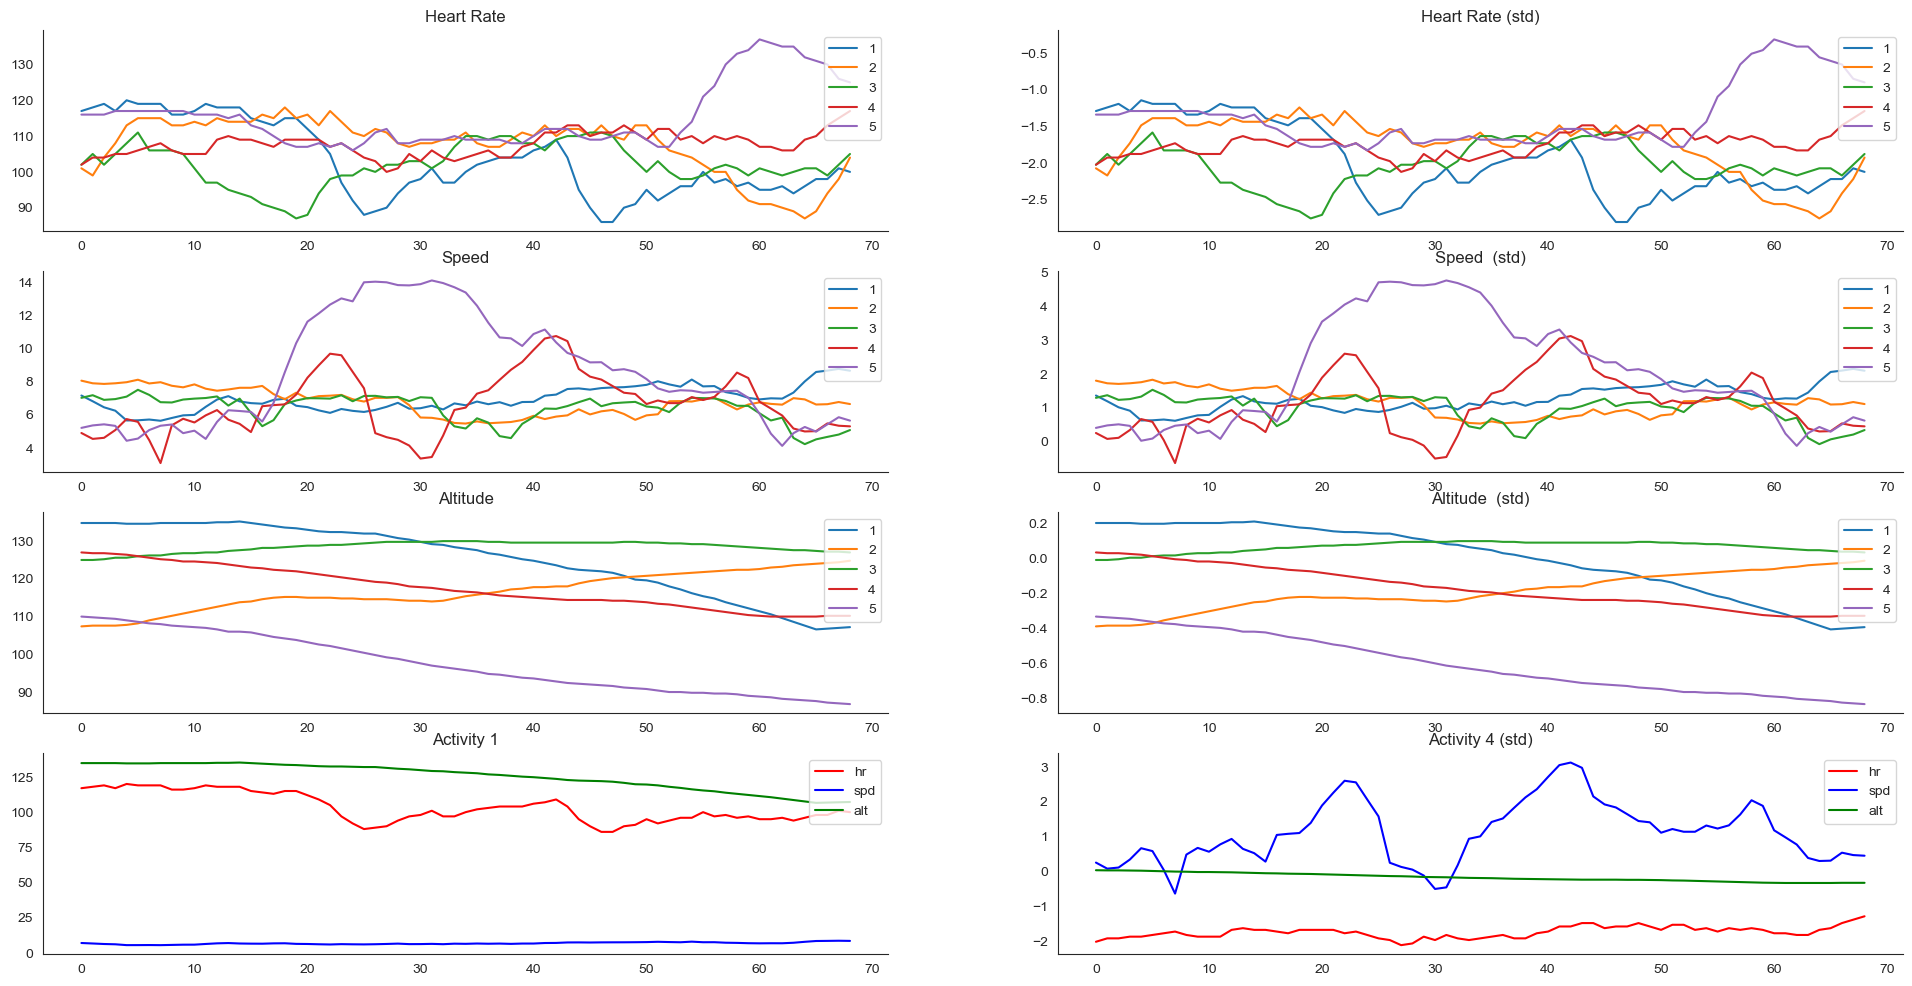

In [ ]:
fig, ax = plt.subplots(4,2,figsize=(24,12))
# Original data plots
ax[0,0].set_title('Heart Rate')
ax[0,0].plot(hr_list[0:5].T)
ax[0,0].legend(['1','2','3','4','5'], loc='upper right')

ax[1,0].set_title('Speed')
ax[1,0].plot(spd_list[0:5].T)
ax[1,0].legend(['1','2','3','4','5'], loc='upper right')

ax[2,0].set_title('Altitude')
ax[2,0].plot(alt_list[0:5].T)
ax[2,0].legend(['1','2','3','4','5'], loc='upper right')

# Scaled data plots
ax[0,1].set_title('Heart Rate (std)')
ax[0,1].plot(hr_std[0:5].T)
ax[0,1].legend(['1','2','3','4','5'], loc='upper right')

ax[1,1].set_title('Speed  (std)')
ax[1,1].plot(spd_std[0:5].T)
ax[1,1].legend(['1','2','3','4','5'], loc='upper right')

ax[2,1].set_title('Altitude  (std)')
ax[2,1].plot(alt_std[0:5].T)
ax[2,1].legend(['1','2','3','4','5'], loc='upper right')

# Plot activity features
ax[3,0].set_title('Activity 1')
ax[3,0].plot(hr_list[0], color='red')
ax[3,0].plot(spd_list[0], color='blue')
ax[3,0].plot(alt_list[0], color='green')
ax[3,0].legend(['hr','spd','alt'], loc='upper right')

ax[3,1].set_title('Activity 4 (std)')
ax[3,1].plot(hr_std[3], color='red')
ax[3,1].plot(spd_std[3], color='blue')
ax[3,1].plot(alt_std[3], color='green')
ax[3,1].legend(['hr','spd','alt'], loc='upper right')

plt.show()

In [ ]:
df_nest_hr = from_2d_array_to_nested(np.array(hr_std))
df_nest_spd = from_2d_array_to_nested(np.array(spd_std))
df_nest_alt = from_2d_array_to_nested(np.array(alt_std))

In [ ]:
df_nest_hr

0
0     0    -1.291614
1    -1.242833
2    -1.194051
3...
1     0    -2.072115
1    -2.169677
2    -1.925771
3...
2     0    -2.023334
1    -1.876990
2    -2.023334
3...
3     0    -2.023334
1    -1.925771
2    -1.925771
3...
4     0    -1.340395
1    -1.340395
2    -1.340395
3...
...                                                 ...
1155  0    -2.608709
1    -2.608709
2    -2.559928
3...
1156  0    -2.169677
1    -2.023334
2    -1.974552
3...
1157  0    -0.267207
1    -0.267207
2    -0.218426
3...
1158  0     0.366950
1     0.318169
2     0.366950
3...
1159  0     0.415731
1     0.464513
2     0.464513
3...

[1160 rows x 1 columns]

In [ ]:
df_multi = pd.DataFrame()
df_multi['hr'] = df_nest_hr
df_multi['spd'] = df_nest_spd
df_multi['alt'] = df_nest_alt
df_multi['target'] = SEQ_SEGMENTED_LABELS.label.astype('category')
df_multi

hr  \
0     0    -1.291614
1    -1.242833
2    -1.194051
3...   
1     0    -2.072115
1    -2.169677
2    -1.925771
3...   
2     0    -2.023334
1    -1.876990
2    -2.023334
3...   
3     0    -2.023334
1    -1.925771
2    -1.925771
3...   
4     0    -1.340395
1    -1.340395
2    -1.340395
3...   
...                                                 ...   
1155  0    -2.608709
1    -2.608709
2    -2.559928
3...   
1156  0    -2.169677
1    -2.023334
2    -1.974552
3...   
1157  0    -0.267207
1    -0.267207
2    -0.218426
3...   
1158  0     0.366950
1     0.318169
2     0.366950
3...   
1159  0     0.415731
1     0.464513
2     0.464513
3...   

                                                    spd  \
0     0     1.362796
1     1.192517
2     1.013872
3...   
1     0     1.803256
1     1.725499
2     1.706798
3...   
2     0     1.293897
1     1.371654
2     1.233856
3...   
3     0     0.251555
1     0.076847
2     0.108836
3...   
4     0     0.403133
1     0.476461
2     0.508450
3...   
...                                                 ...   
1155  0    -1.337548
1    -1.332627
2    -1.332627
3...   
1156  0    -1.117072
1    -1.121501
2    -1.126422
3...   
1157  0    -0.621000
1    -0.621000
2    -0.621000
3...   
1158  0    -0.446784
1    -0.451213
2    -0.460564
3...   
1159  0    -0.575231
1    -0.579660
2    -0.584582
3...   

                                                    alt   target  
0     0     0.199635
1     0.199635
2     0.199635
3...   Biking  
1     0    -0.390335
1    -0.386029
2    -0.386029
3...   Biking  
2     0    -0.011376
1    -0.011376
2    -0.007070
3...   Biking  
3     0     0.031687
1     0.027381
2     0.027381
3...   Biking  
4     0    -0.334353
1    -0.338659
2    -0.342965
3...   Biking  
...                                                 ...      ...  
1155  0     3.386335
1     3.386335
2     3.390642
3...  Running  
1156  0     3.416480
1     3.412174
2     3.412174
3...  Running  
1157  0     3.377723
1     3.382029
2     3.377723
3...  Running  
1158  0     3.382029
1     3.382029
2     3.386335
3...  Running  
1159  0     3.416480
1     3.420786
2     3.425093
3...  Running  

[1160 rows x 4 columns]

We may also tabularize data for sklearn models, but it should be done for each dimension separately

In [ ]:
from sktime.transformations.panel.reduce import Tabularizer
tabu = Tabularizer()
df_test_tabu = tabu.fit_transform(df_multi.iloc[:,0:3])

In [ ]:
df_test_tabu

0         1         2         3         4         5         6    \
0    -1.291614 -1.242833 -1.194051 -1.291614 -1.145270 -1.194051 -1.194051   
1    -2.072115 -2.169677 -1.925771 -1.730646 -1.486739 -1.389177 -1.389177   
2    -2.023334 -1.876990 -2.023334 -1.876990 -1.730646 -1.584302 -1.828208   
3    -2.023334 -1.925771 -1.925771 -1.876990 -1.876990 -1.828208 -1.779427   
4    -1.340395 -1.340395 -1.340395 -1.291614 -1.291614 -1.291614 -1.291614   
...        ...       ...       ...       ...       ...       ...       ...   
1155 -2.608709 -2.608709 -2.559928 -2.462365 -2.462365 -2.413584 -2.462365   
1156 -2.169677 -2.023334 -1.974552 -2.120896 -2.267240 -2.364803 -2.413584   
1157 -0.267207 -0.267207 -0.218426 -0.169644 -0.218426 -0.169644 -0.120863   
1158  0.366950  0.318169  0.366950  0.366950  0.318169  0.318169  0.318169   
1159  0.415731  0.464513  0.464513  0.464513  0.464513  0.464513  0.415731   

           7         8         9    ...       197       198       199  \
0    -1.194051 -1.340395 -1.340395  ... -0.286983 -0.304208 -0.321434   
1    -1.389177 -1.486739 -1.486739  ... -0.067359 -0.063052 -0.054440   
2    -1.828208 -1.828208 -1.876990  ...  0.061832  0.057525  0.053219   
3    -1.730646 -1.828208 -1.876990  ... -0.325740 -0.330046 -0.334353   
4    -1.291614 -1.291614 -1.291614  ... -0.786520 -0.790826 -0.795132   
...        ...       ...       ...  ...       ...       ...       ...   
1155 -2.511146 -2.511146 -2.511146  ...  3.416480  3.416480  3.416480   
1156 -2.413584 -2.218459 -2.120896  ...  3.377723  3.377723  3.382029   
1157 -0.072082 -0.072082 -0.072082  ...  3.386335  3.386335  3.386335   
1158  0.269387  0.318169  0.269387  ...  3.399255  3.399255  3.403561   
1159  0.415731  0.415731  0.415731  ...  3.472463  3.472463  3.476769   

           200       201       202       203       204       205       206  
0    -0.342965 -0.364497 -0.386029 -0.407561 -0.403254 -0.398948 -0.394642  
1    -0.050133 -0.041521 -0.037214 -0.032908 -0.028602 -0.024295 -0.015682  
2     0.048913  0.044606  0.044606  0.040300  0.035994  0.035994  0.031687  
3    -0.334353 -0.334353 -0.334353 -0.334353 -0.330046 -0.330046 -0.330046  
4    -0.803745 -0.808051 -0.812358 -0.816664 -0.825277 -0.829583 -0.833889  
...        ...       ...       ...       ...       ...       ...       ...  
1155  3.416480  3.416480  3.416480  3.416480  3.416480  3.416480  3.416480  
1156  3.382029  3.382029  3.382029  3.382029  3.382029  3.377723  3.382029  
1157  3.382029  3.386335  3.386335  3.386335  3.386335  3.386335  3.386335  
1158  3.403561  3.403561  3.407867  3.407867  3.412174  3.416480  3.416480  
1159  3.476769  3.472463  3.468157  3.476769  3.476769  3.476769  3.481076  

[1160 rows x 207 columns]

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled = scaler.fit_transform(df_test)

**Let's test classification**

In [ ]:
from sktime.classification.dictionary_based import MUSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

`class MUSE(anova=True, 
            variance=False, 
            bigrams=True, 
            window_inc=2, 
            alphabet_size=4, 
            use_first_order_differences=True, 
            feature_selection='chi2', 
            p_threshold=0.05, 
            support_probabilities=False, 
            n_jobs=1,  
            random_state=None)`

In [ ]:
x_tr, x_te, y_tr, y_te = train_test_split(df_multi.iloc[:,0:3], 
                                          df_multi.iloc[:,3], 
                                          test_size=0.2, 
                                          random_state=24, 
                                          stratify=df_multi.iloc[:,3], 
                                          shuffle=True)

clf = MUSE(window_inc=4, use_first_order_differences=False)
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_te)

print(classification_report(y_pred, y_te))

              precision    recall  f1-score   support

      Biking       0.98      0.92      0.95        52
       Other       0.97      0.97      0.97       109
     Running       0.96      1.00      0.98        71

    accuracy                           0.97       232
   macro avg       0.97      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232



<div style='background-color: pink; height:100px; padding:50px'>
    <p>Data structure test - end</p> 
</div>

<a id="2B"></a> <br>
### [▲](#2) 2B - Train-Test data splitting *(stratified by y)*

- Dataset generation from the sequencies
- Train and Test splits
- Functions for data variable initialization
- Global variable `SEQ_LEN` will be initialized

In [ ]:
# Data manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sktime.transformations.panel.reduce import Tabularizer

In [ ]:
# These variables need to defined here to avoid (not defined warning in the Data setup functions)
DATA, LABELS = (None, None)

**Data setup functions**

Function to create dataset

In [ ]:
def create_dataset(sequences, targets, seq_start=0, seq_end=100, std=False, info=True):

    if info: print("\nSequence/Targets length validity check: ", len(sequences), len(targets))

    target = targets.label.astype('category').cat.codes

    seq_len = seq_end - seq_start

    x_data = np.zeros((len(sequences), seq_len))
    y_data = np.zeros(len(sequences))

    if info: print(x_data.shape, y_data.shape)

    for i, s in zip(range(0,len(sequences)), sequences):
        if info: print(i,s.shape)
        # Sequence manipulation
        signal = s.reshape(-1,1)
        signal = np.squeeze(np.asarray(signal))
        signal = signal[seq_start:seq_end]
        #if info: print(signal.shape)
        x_data[i] = signal
        y_data[i] = target[i]

    if std:
        if info: print("Standardization")
        x_data = StandardScaler().fit_transform(x_data)

    print('X:', x_data.shape, ' y:', y_data.shape)

    return x_data, y_data

Nested data variable reset function

In [ ]:
# Run this if data variable reset needed
def initdata_xynested(seq_start, seq_end):
    global x_data, y_data
    global x_train, x_test, y_train, y_test
    global X_train_nest, X_test_nest
    # The whole data
    x_data, y_data = create_dataset(DATA, LABELS, seq_start=seq_start, seq_end=seq_end, std=False, info=False)
    # Train-Test data splits
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=24, stratify=y_data, shuffle=True)
    print('Train:', x_train.shape, y_train.shape, 'Test:', x_test.shape, y_test.shape)
    # Multivariate
    X_train_nest = from_2d_array_to_nested(x_train)
    X_test_nest  = from_2d_array_to_nested(x_test)

Nested data variable reset function (Standard)

In [ ]:
# Run this if standard data variable reset needed
def initdata_xynested_std(seq_start, seq_end):
    global x_data_std, y_data
    global x_train_std, x_test_std, y_train, y_test
    global X_train_nest_std, X_test_nest_std
    # The whole data (standard)
    x_data_std, y_data = create_dataset(DATA, LABELS, seq_start=seq_start, seq_end=seq_end, std=True, info=False)
    # Train-Test data splits (standard)
    x_train_std, x_test_std, y_train, y_test = train_test_split(x_data_std, y_data, test_size=0.2, random_state=24, stratify=y_data, shuffle=True)
    print('Train:', x_train_std.shape, y_train.shape, 'Test:', x_test_std.shape, y_test.shape)
    # Multivariate
    X_train_nest_std = from_2d_array_to_nested(x_train_std)
    X_test_nest_std  = from_2d_array_to_nested(x_test_std)

Tabular data reset function

- This function uses global variables `X_train_nest_std`, `X_test_nest_std` and tabularizes them. Therefore recommended to use only together with nested data variable reset functions
- New global variables `X_train_tab`, `X_test_tab`, `X_train_tab_std` and `X_test_tab_std` will be initialized

In [ ]:
def initdata_xytabular(std=False):
    global X_train_tab, X_test_tab
    tabu = Tabularizer()
    X_train_tab = tabu.fit_transform(X_train_nest)
    X_test_tab = tabu.fit_transform(X_test_nest)

    if std:
        global X_train_tab_std, X_test_tab_std
        tabu = Tabularizer()
        X_train_tab_std = tabu.fit_transform(X_train_nest_std)
        X_test_tab_std = tabu.fit_transform(X_test_nest_std)

Data reset function

`init_data(seq_start, seq_end, nest=True, tab=False, std=False)`

In [ ]:
def init_data(seq_start, seq_end, nest=True, tab=False, std=False):
    # Initilaizes nested data variables for sktime classification models
    if nest:
        initdata_xynested(seq_start, seq_end)
        # Standard
        if std:
            initdata_xynested_std(seq_start, seq_end)

    # Initializes tabular data for sklearn classifiers
    if tab:
        initdata_xytabular()
        # Standard
        if std:
            initdata_xytabular(std=True)

**Initialize data**
- Initializes global data variables according to the given parameters
- Creates the data splits (and feedback prints according to the *create_dataset()* function)

***Important note!***

In variable `SEQ_SEGMENTED` data is already in equal length segments from the interval of `[0,1000]` (5x200). So, when creating segments it is defined that we get 5 splits in the length of 200 from the original sequence. It implies that `init_data()` function call can therefore use the range of `[0,600] (3x200=600)` because `create_dataset()` function flattens the three dimensional data.


**Select data**

Note: Only selected data is processed. Selection is global.

In [ ]:
# Setup for full length sequences
#DATA, LABELS = (SEQ_FILTERED, INDEX_DATA)
#SEQ_START = 100
#SEQ_END = int(seq_analysis_df['Filtered']['min'])

# Setup for segmented equal length sequences
DATA, LABELS = (SEQ_SEGMENTED, SEQ_SEGMENTED_LABELS)
SEQ_START = 0
SEQ_END = SEG_LEN*3 # E.g., if SEG_LEN=69, we use 3*69=207 "multivariate" signal

In [ ]:
SEQ_START, SEQ_END

(0, 207)

In [ ]:
init_data(SEQ_START, SEQ_END, nest=True, tab=True, std=True)

X: (1160, 207)  y: (1160,)
Train: (928, 207) (928,) Test: (232, 207) (232,)
X: (1160, 207)  y: (1160,)
Train: (928, 207) (928,) Test: (232, 207) (232,)


In [ ]:
X_train_nest_std.head(5)

0
0  0      0.515939
1     -0.268068
2     -0.10583...
1  0      1.047489
1      0.516461
2      0.18663...
2  0      0.902521
1      1.066337
2     -0.02411...
3  0     -0.402193
1      1.949561
2      0.27696...
4  0     -0.208902
1     -0.846142
2      2.41460...

Random time series plots (for analysis)

Activity type = 1


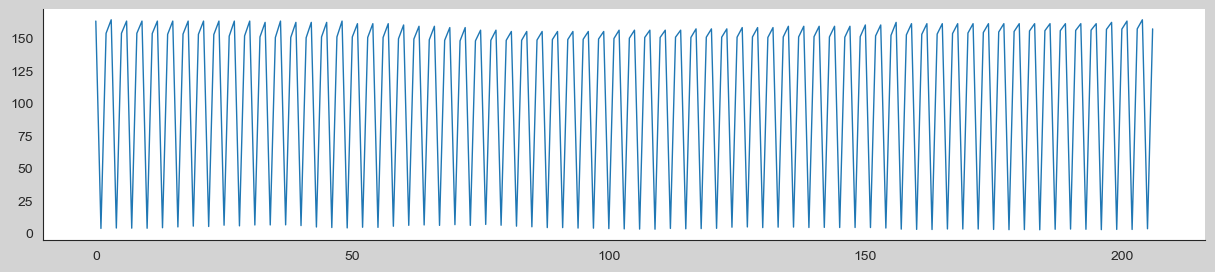

Activity type = 1


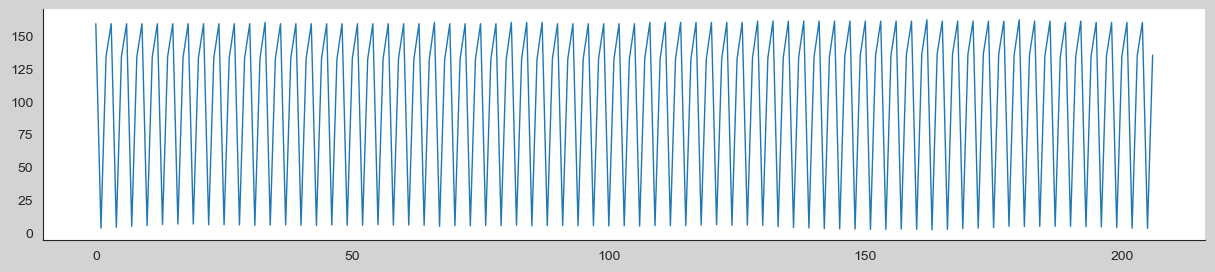

In [ ]:
plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_train[16], lw=1)
print("Activity type = %d" % y_train[16])
plt.show()

plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_test[2], lw=1)
print("Activity type = %d" % y_test[2])
plt.show()

<a id="2C"></a> <br>
### [▲](#2) 2C - Data Standardization *(for visualization)*

- Data can be standardized using **create_dataset(** *std=True* **)** function parameter
- This section procedure has precondition that **x_train** and **x_test** data is in two dimensional space

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Activity type = 1


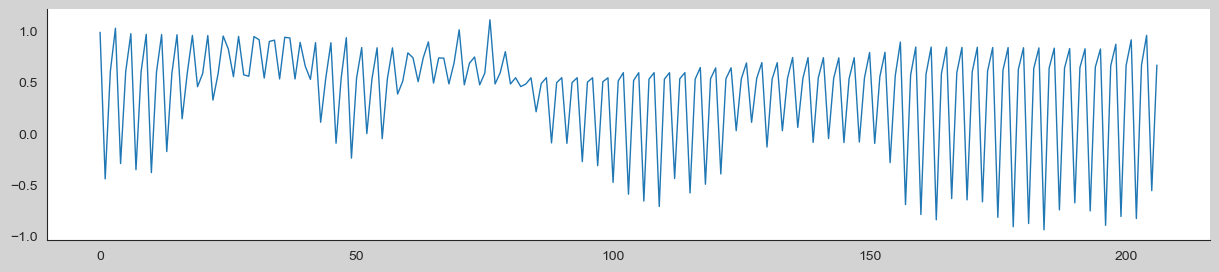

Activity type = 1


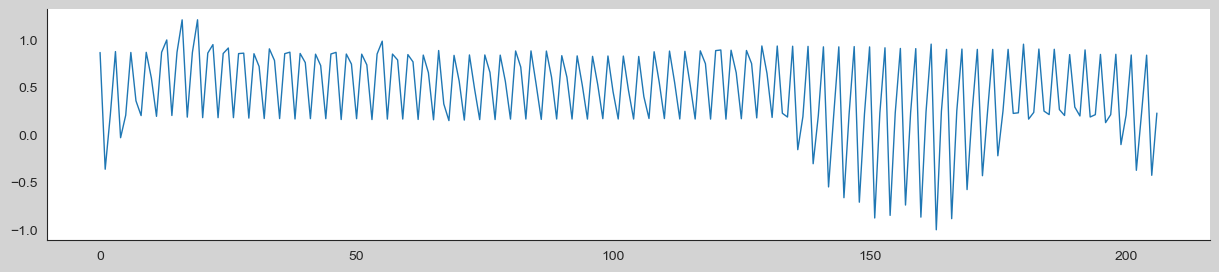

In [ ]:
plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_train[16], lw=1)
print("Activity type = %d" % y_train[16])
plt.show()

plt.figure(figsize=(15,3), facecolor='lightgray')
plt.plot(x_test[2], lw=1)
print("Activity type = %d" % y_test[2])
plt.show()

In [ ]:
label1 = x_train[np.where(y_train==0)]
label2 = x_train[np.where(y_train==1)]
label3 = x_train[np.where(y_train==2)]

print(len(label1), len(label2), len(label3))

196 436 296


In [ ]:
# Or
pd.DataFrame(y_train.astype(int)).value_counts()

1    436
2    296
0    196
dtype: int64

**Random activities (for each category)**

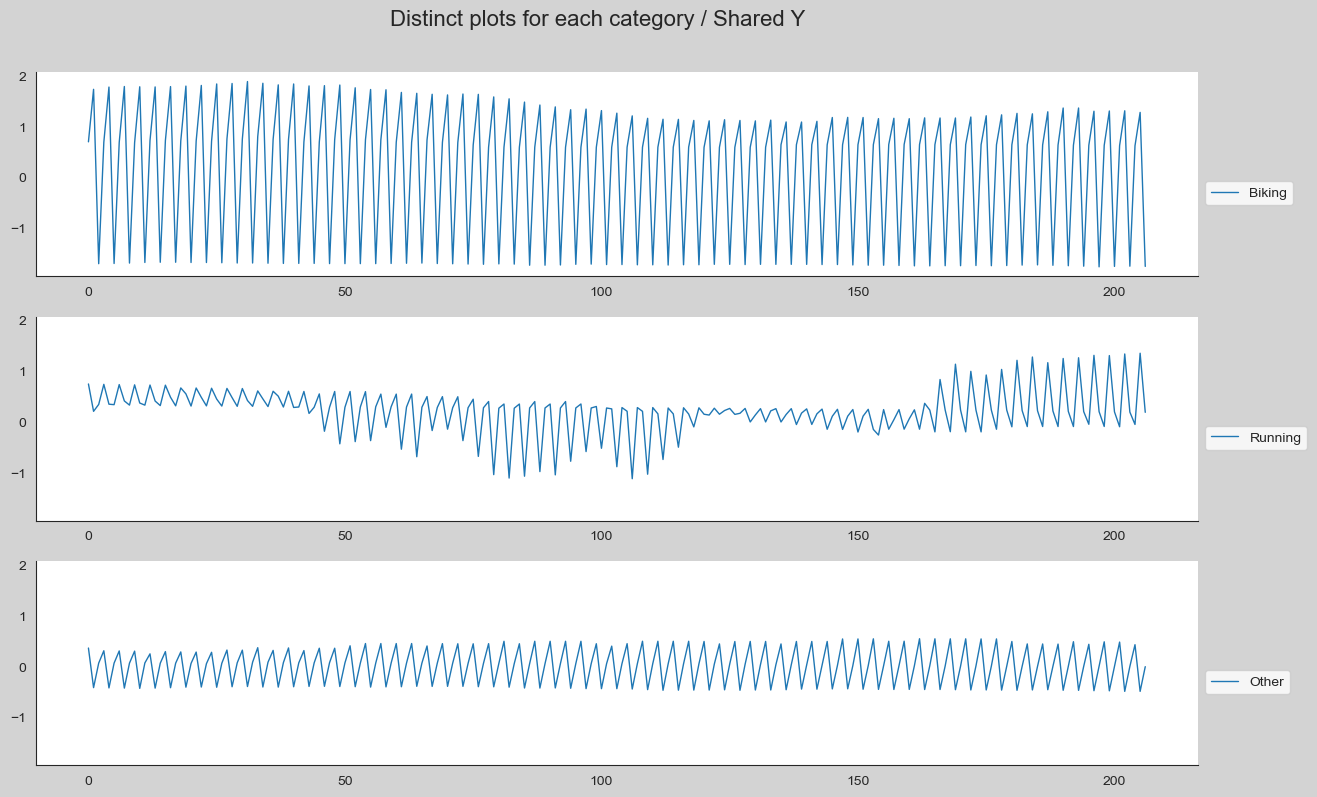

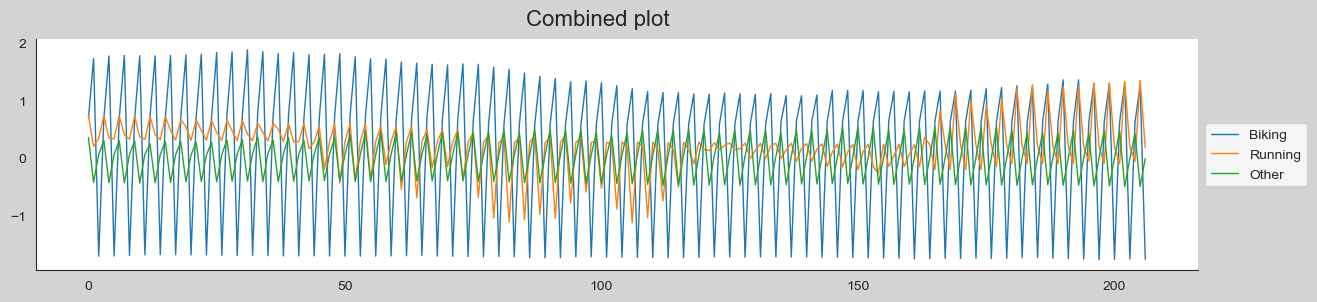

In [ ]:
#@title { run: "auto" }
rand_index = 35 #@param {type:"slider", min:0, max:42, step:1}

fig, ax = plt.subplots(3,1, figsize=(15,9), facecolor='lightgray', sharey=True)
fig.suptitle('Distinct plots for each category / Shared Y', y=0.95, fontsize=16)
ax[0].plot(label1[rand_index], lw=1, label='Biking')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
ax[1].plot(label2[rand_index], lw=1, label='Running')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
ax[2].plot(label3[rand_index], lw=1, label='Other')
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

fig = plt.figure(figsize=(15,3), facecolor='lightgray')
fig.suptitle('Combined plot', fontsize=16)
plt.plot(label1[rand_index], lw=1, label='Biking')
plt.plot(label2[rand_index], lw=1, label='Running')
plt.plot(label3[rand_index], lw=1, label='Other')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Random activities (for same category)**

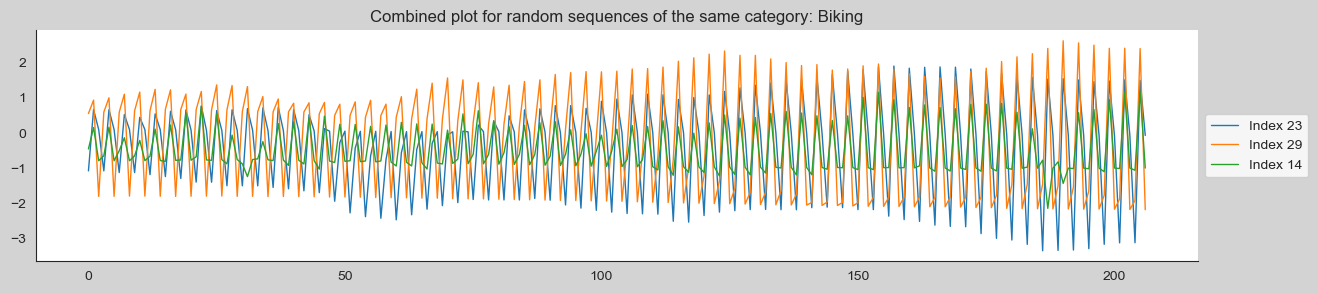

In [ ]:
#@title { run: "auto" }
rand_index1 = 23 #@param {type:"slider", min:0, max:42, step:1}
rand_index2 = 29 #@param {type:"slider", min:0, max:42, step:1}
rand_index3 = 14 #@param {type:"slider", min:0, max:42, step:1}
label = label1 #@param ["label1", "label2", "label3"] {type: "raw"}


plt.figure(figsize=(15,3), facecolor='lightgray')
plt.title("Combined plot for random sequences of the same category: Biking")
plt.plot(label[rand_index1], lw=1, label='Index ' + str(rand_index1))
plt.plot(label[rand_index2], lw=1, label='Index ' + str(rand_index2))
plt.plot(label[rand_index3], lw=1, label='Index ' + str(rand_index3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

---

<a id="3"></a> <br>
## [▲](#CT) 3 - Multivariate Time Series Classification (TSA)

SKTIME
- [X] Time Series Forest Classifier
- [X] Supervised Time Series Forest
- [X] Random Interval Spectral Ensemble (RISE)
- [X] Random Interval Classifier
- [X] Shapelet Transform Classifier
- [X] KNeighbors Time Series Classifier
- [X] Composable Time Series Forest Classifier
- [O] Optional: Canonical Interval Forest


SKLEARN
- [X] Random Forest Classifier
- [X] Decision Tree Classifier
- [X] Ridge Classifier CV
- [X] Support Vector Classifier
- [X] KNeighborsClassifier
- [X] Gradient Boosting Classifier
- [X] Stochastic Gradient Descent Classifier

<a id="3A"></a> <br>
### [▲](#3) 3A - Libraries and functions

Some dependencies must be installed

In [ ]:
%pip install tsfresh
%pip install esig
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# SKLearn classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# SKTime classifiers
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.interval_based import SupervisedTimeSeriesForest
from sktime.classification.interval_based import RandomIntervalSpectralEnsemble # RISE
from sktime.classification.feature_based import RandomIntervalClassifier
from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
#from sktime.classification.interval_based import CanonicalIntervalForest
# SKTime - Multivariate
from sktime.classification.dictionary_based import WEASEL
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.dictionary_based import MUSE


# Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, mean_squared_error
# Time and Progress bar solution (tqdm)
from time import time
from tqdm import tqdm
# Extra tools
from matplotlib import gridspec

**Helper functions and variables**

In [ ]:
def plot_confmatrix(ax, yval, ypred):
    cm = pd.DataFrame(confusion_matrix(yval, ypred))
    cm_norm = cm.apply(lambda x: x/x.sum(), axis = 1)
    sns.set(font_scale=1.1) # for label size
    sns.heatmap(cm_norm, annot=True, xticklabels=('Pred A1', 'Pred A2','Pred A3'), 
                                     yticklabels=('Act A1', 'Act A2','Act A3'),
                                     fmt='.1%',
                                     cmap='Blues',
                                     ax=ax,
                                     annot_kws={"size": 16}) # font size

In [ ]:
# Classification report properties for matplotlip.table
col_colors = ['lightgray','lightgray','lightgray','skyblue','skyblue','skyblue']
row_colors = ['lightgray','lightgray','lightgray','lightgray']
cell_colors = [['white','white','white','lightgray','white','white'],
               ['white','white','white','lightgray','white','white'],
               ['white','white','white','lightgray','white','white'],
               ['white','white','white','lightgray','white','white']]

In [ ]:
'''
Creates list of column names according to the parameters
- @general: Start of the column name
- @num: Identification number for column
Output for function call create_col_names(general='Score', num=3) 
=> ['Score 1','Score 2', 'Score 3']
'''
def create_col_names(general, num, info=False):
    col_names = []
    for i in range(1,num+1):
        col_names.append(general + str(i))
    
    if info: print("Columns created: ", col_names)
    
    return col_names

**Classification functions**

In [ ]:
'''
This classification funtion takes models and data as a function parameters ans prints out the results.
Notice, that results are only printed immediately when classification is completed, but nothing is stored. 
Therefore, when execution fails all the data will be lost. Be careful!
'''
def classify_report(models, x_train, y_train, x_test, y_test):
    for name, sktime_clf in models.items():
        # Classify
        clf = sktime_clf 
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name, accuracy_score(y_test, y_pred))
        # Create figure and grid for different subplots
        fig = plt.figure(figsize=(18,3))
        spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[1, 2], wspace=0.3)
        # Plot confusion matrix
        ax1 = fig.add_subplot(spec[0])
        plot_confmatrix(ax1, y_test, y_pred)
        # Plot classification report
        report = pd.DataFrame(classification_report(y_test, y_pred, digits=3, output_dict=True))
        ax2 = fig.add_subplot(spec[1])
        font_size=16
        bbox=[0, 0, 1, 1]
        ax2.axis('off')
        mpl_table = ax2.table(cellText=np.round(report.values,4), 
                            rowLabels=report.index, bbox=bbox, 
                            colLabels=report.columns,
                            colColours=col_colors,
                            rowColours=row_colors,
                            cellColours=cell_colors,
                            edges='closed')
        mpl_table.auto_set_font_size(False)
        mpl_table.set_fontsize(font_size)
        plt.show()

In [ ]:
'''
Classification function which creates result tables. However, it does not create or print out any kind of analysis, 
such as correlation matrixes etc.
Data given as parameters have to be according to the classifier's requirements. 
Usability for different type of classifiers is quite flexible. 
Remeber to use correct classifier type name from the list
clf_type = sktime | sklearn | sklearn-tree
'''
def classify(classifiers, clf_type, X_train, X_test, y_train, y_test, results, preds, iters):
    # Pandas dataframe for results
    if results is None:
        results = pd.DataFrame(columns=['Classifier','Type','Train(t)','Test(t)'])
        preds = pd.DataFrame()
    
    # Create column names for scores according to the number of iterations
    score_col_names = create_col_names('Score_', iters)
    
    # Create progress bar with non-default styles
    progress_bar = tqdm(classifiers.items(), ncols=100, colour='#87ceeb', file=sys.stdout)
    
    for name, clf in progress_bar:
        progress_bar.set_description("Processing \033[1m ➥%s \033[0m" % str(clf)) # Includes bold text printing
        score_row = pd.DataFrame(data={'Classifier':name,'Type':clf_type,}, index=[0])
        
        # Insert score colums for each iterations
        for i in range(1,iters+1):
            score_row[score_col_names] = 0
        
        best_score = 0

        for iter in range(1,iters+1):
            start = time() # Start timing the model
            clf.fit(X_train, y_train)
            train_time = time() - start # Stop train timer
            start = time()              # Start test timer
            # Predictions
            y_pred = clf.predict(X_test)
            # Model scores
            score = accuracy_score(y_test, y_pred)
            score_time = time()-start
            # Set values (note: time data will be overwritten in each iteration)
            score_row['Train(t)'] = train_time
            score_row['Test(t)'] = score_time
            score_row[score_col_names[iter-1]] = score
            # Among iterations, we could take only one mse, f1 and roc. We store them for the best accuracy.
            if score > best_score:
                # STORE PREDICTIONS to a data frame
                if clf_type not in ['sktime-multivar']:
                    preds[name] = y_pred
                # More metrics
                # MSE, F1 and ROC-AUC scores
                score_row['mse'] = mean_squared_error(y_test, y_pred)
                score_row['f1'] = f1_score(y_test, y_pred, average='micro')
                if clf_type in ['sktime','sklearn-tree']:
                    y_pred_proba = clf.predict_proba(X_test)
                    score_row['roc-auc'] = roc_auc_score(y_test, y_pred_proba, average="weighted", multi_class="ovr")
                else:
                    score_row['roc-auc'] = np.nan
                best_score = score
            
        results = pd.concat((results, score_row), axis=0, ignore_index=True)
        
    print('Classification done for ' + clf_type + '\n')
    
    return results, preds

<a id="3B"></a> <br>
### [▲](#3) 3B - Data setup

Here we initialize global variables 
`x_data_std, y_data, x_train_std, x_test_std, y_train, y_test` using function `init_data(...)`

In [ ]:
init_data(SEQ_START, SEQ_END, nest=True, tab=True, std=True)

X: (1160, 207)  y: (1160,)
Train: (928, 207) (928,) Test: (232, 207) (232,)
X: (1160, 207)  y: (1160,)
Train: (928, 207) (928,) Test: (232, 207) (232,)


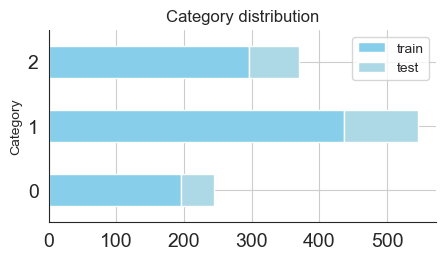

In [ ]:
# Create data to count category distribution in train and test data
y_train_labels = pd.DataFrame(y_train.astype(int), columns=['cat'])
y_train_labels['split'] = 'train'
y_test_labels = pd.DataFrame(y_test.astype(int), columns=['cat'])
y_test_labels['split'] = 'test'
cat_distribut_tbl = pd.concat([y_train_labels, y_test_labels])
cat_distribut_tbl = cat_distribut_tbl.groupby(['cat', 'split'])['cat'].count().unstack('split')
# Plot dataframe
cat_distribut_tbl[['train','test']].plot(kind='barh', stacked=True, 
                                         title='Category distribution',
                                         xlabel='Category', ylabel='Instances', 
                                         figsize=(5,2.5),
                                         fontsize=14, rot=0, 
                                         color=['skyblue', 'lightblue'],
                                         grid=True).legend(loc='upper right')

#### Signal visualization in test data

In [ ]:
labels, counts = np.unique(y_test, return_counts=True)
print(labels, counts)

[0. 1. 2.] [ 49 109  74]


In [ ]:
X_test_nest_std.rename(columns={0:'dim_0'}).head() # For report we change the column name temporarily

dim_0
0  0      1.144134
1      0.568327
2      0.42319...
1  0     -1.127033
1      0.596525
2     -0.58755...
2  0      0.805875
1     -0.348132
2      0.19524...
3  0     -0.643806
1      0.526029
2     -0.05422...
4  0      1.627362
1      0.008884
2      0.20384...

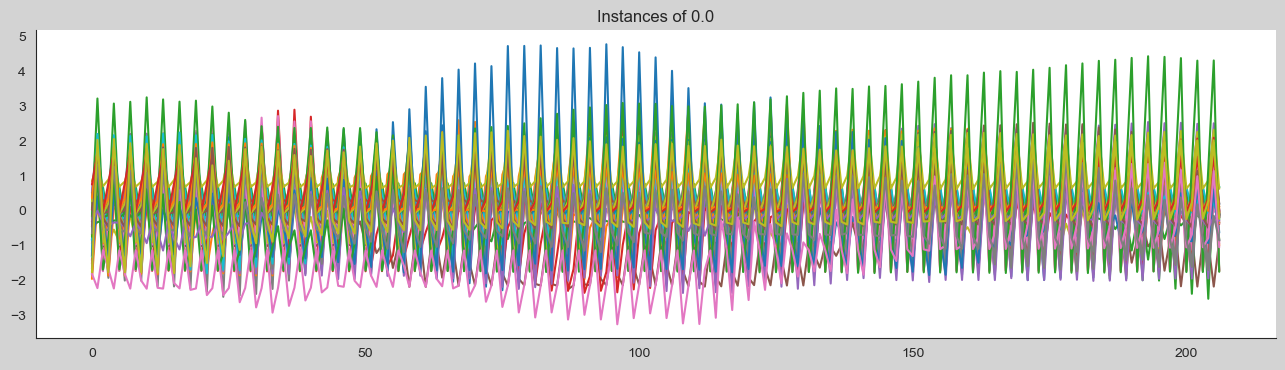

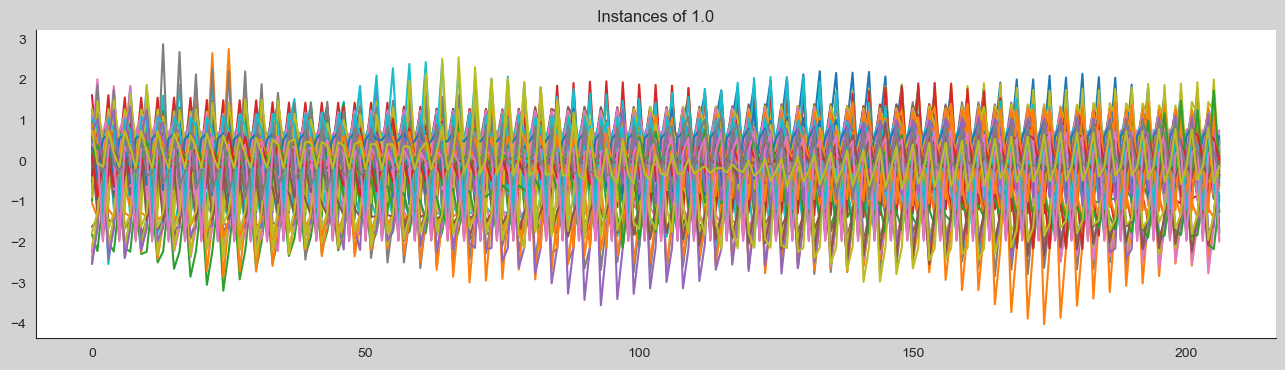

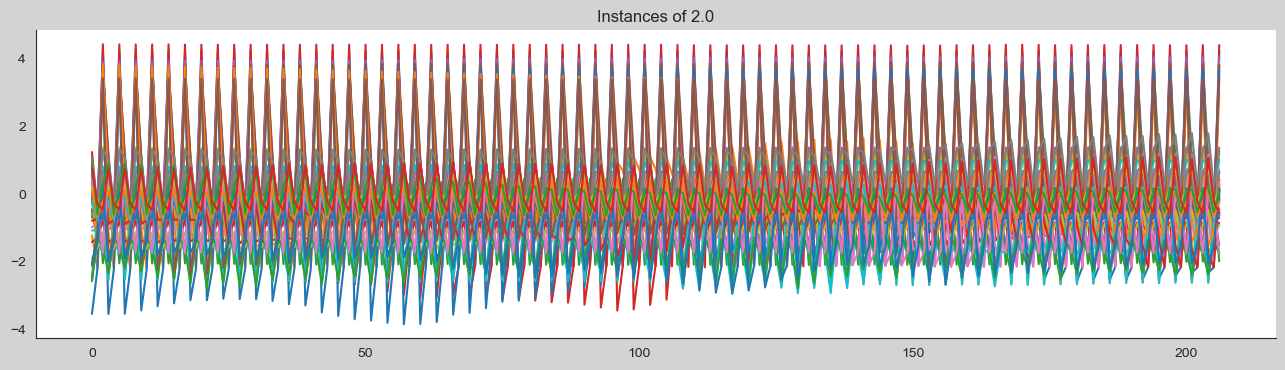

In [ ]:
for label in labels:
    fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25), facecolor='lightgray')
    for instance in X_test_nest_std.loc[y_test==label, 0]:
        ax.plot(instance, label='label')
    ax.set(title=f"Instances of {label}")

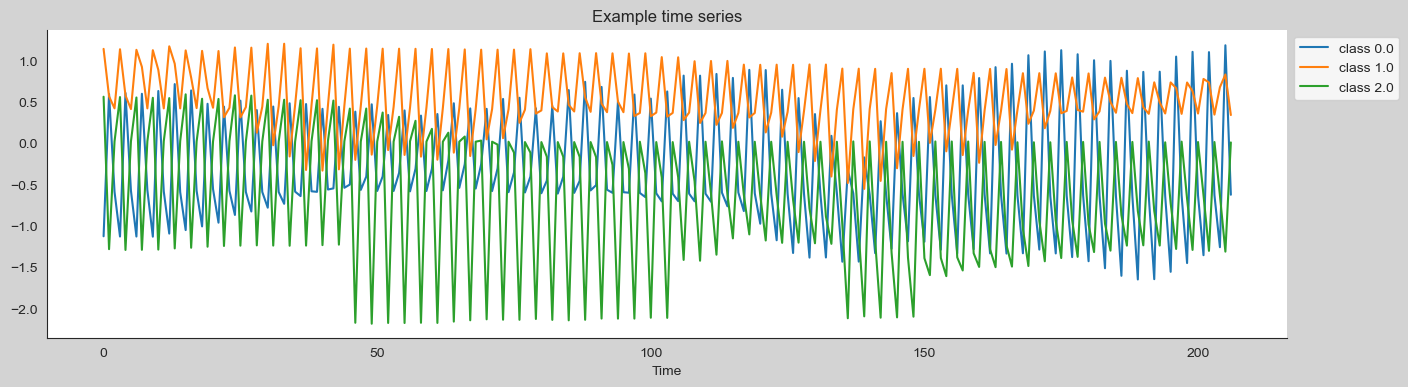

In [ ]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25), facecolor='lightgray')
for label in labels:
    X_test_nest_std.loc[y_test==label, 0].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set(title="Example time series", xlabel="Time");

<a id="3C"></a> <br>
### [▲](#3) 3C - SKTime classifiers 

**Time Series Forest (TSF)** classifier adapts the *Random Forest* classifier to series data.

1. Split the series into random intervals, with random start positions and random lengths.
2. Extract summary features (mean, standard deviation, and slope) from each interval into a single feature vector.
3. Train a decision tree on the extracted features.
4. Repeat steps 1–3 until the required number of trees have been built or time runs out.

**Supervised Time Series Forest** is an ensemble of decision trees built on intervals selected through a supervised process. 

Overview: Input *n* series length *m* For each tree
- Sample X using class-balanced bagging
- Sample intervals for all 3 representations and 7 features using supervised method
- Find mean, median, std, slope, iqr, min and max using their corresponding interval for each rperesentation, concatenate to form new data set
- Build decision tree on new data set

Ensemble the trees with averaged probability estimates.

Time series classification (TSC) aims to predict the class label of a given time series. Modern applications such as appliance modelling require to model an abundance of long time series, which makes it difficult to use many state-of-the-art TSC techniques due to their high computational cost and lack of interpretable outputs. To address these challenges, we propose a novel TSC method: the Supervised Time Series Forest (STSF). STSF improves the classification efficiency by examining only a (set of) sub-series of the original time series, and its tree-based structure allows for interpretable outcomes. STSF adapts a top-down approach to search for relevant sub-series in three different time series representations prior to training any tree classifier, where the relevance of a sub-series is measured by feature ranking metrics (i.e., supervision signals). Experiments on extensive real datasets show that STSF achieves comparable accuracy to state-of-the-art TSC methods while being significantly more efficient, enabling TSC for long time series.

N. Cabello, E. Naghizade, J. Qi and L. Kulik, "Fast and Accurate Time Series Classification Through Supervised Interval Search," 2020 IEEE International Conference on Data Mining (ICDM), 2020, pp. 948-953, doi: 10.1109/ICDM50108.2020.00107.

**Random Interval Spectral Ensemble**, or **RISE**, is a popular variant of *Time Series Forest*.

RISE differs from Time Series Forest in two ways. First, it uses a single time series interval per tree. Second, it is trained using spectral features extracted from the series, instead of summary statistics.

RISE use several series-to-series feature extraction transformers, including:

- Fitted auto-regressive coefficients
- Estimated autocorrelation coefficients
- Power spectrum coefficients (the coefficients of the Fourier transform)

The RISE algorithm is straightforward:

1. Select random interval of a series (length is a power of 2). (For the first tree, use the whole series)
2. For the same interval on each series, apply the series-to-series feature extraction transformers (autoregressive coefficients, autocorrelation coefficients, and power spectrum coefficients)
3. Form a new training set by concatenating the extracted features
4. Train a decision tree classifier
5. Ensemble 1–4

Class probabilities are calculated as a proportion of base classifier votes. RISE controls the run time by creating an adaptive model of the time to build a single tree. This is important for long series (such as audio), where very large intervals can mean very few trees.


**Shapelet-Based Classifiers**

Shapelets are subsequences, or small sub-shapes of time series that are representative of a class. They can be used to detect “phase-independent localised similarity between series within the same class” [1].

<img src="https://raw.githubusercontent.com/JABE22/Image/main/Random/shapelet_classifier.png" />

The blue line is the original time series. The red line is the shapelet extracted from it. Image modified from [4].
A single shapelet is an interval in a time series. The intervals in any series can be enumerated. For example, [1,2,3,4] has 5 intervals: [1,2], [2,3], [3,4], [1,2,3], [2,3,4].

Shapelet-based classifiers search for shapelets with discriminatory power.

These shapelet features can then be used to interpret a shapelet-based classifier — the presence of certain shapelets make one class more likely than another.

In [120]:
sktime_clfs = {
    'TimeSeriesForestClassifier': TimeSeriesForestClassifier(),
    'SupervisedTimeSeriesForest': SupervisedTimeSeriesForest(),
    'RandomIntervalSpectralEnsemble': RandomIntervalSpectralEnsemble(),
    'RandomIntervalClassifier': RandomIntervalClassifier(),
    'ShapeletTransformClassifier': ShapeletTransformClassifier(),
    'KNeighborsTimeSeriesClassifier': KNeighborsTimeSeriesClassifier(),
    'ComposableTimeSeriesForestClassifier': ComposableTimeSeriesForestClassifier(), # Time consuming
    #'CanonicalIntervalForest': CanonicalIntervalForest(),                          # Extreme time consuming
}

TimeSeriesForestClassifier 0.9094827586206896


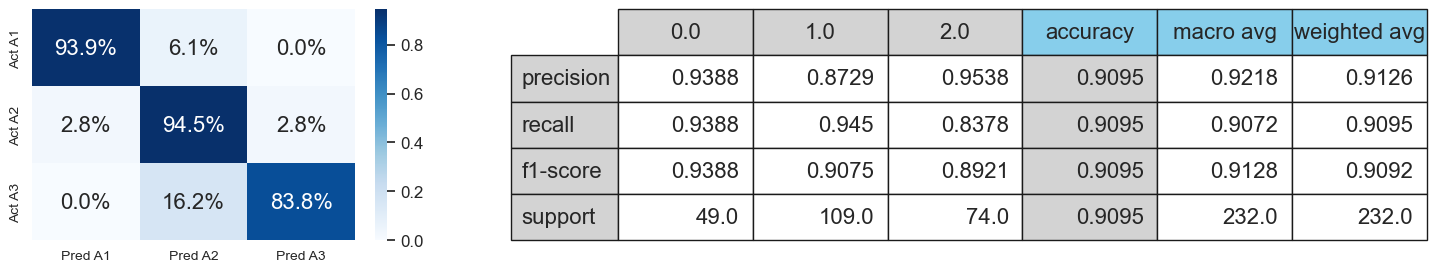

SupervisedTimeSeriesForest 0.9267241379310345


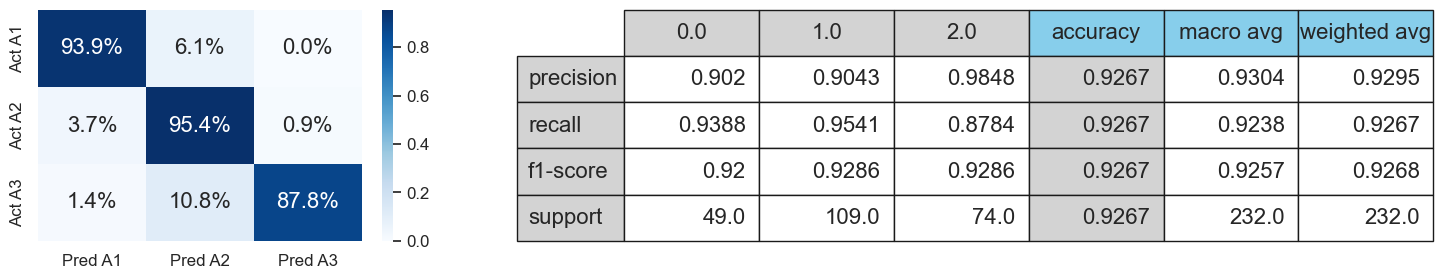

RandomIntervalSpectralEnsemble 0.896551724137931


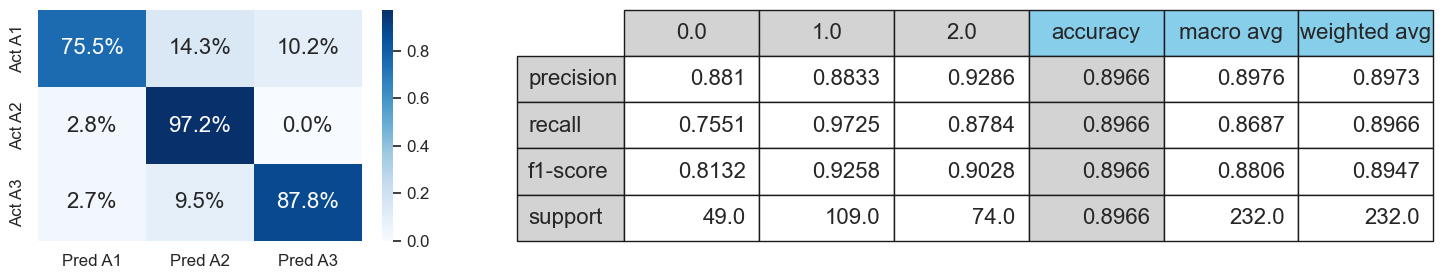

RandomIntervalClassifier 0.9181034482758621


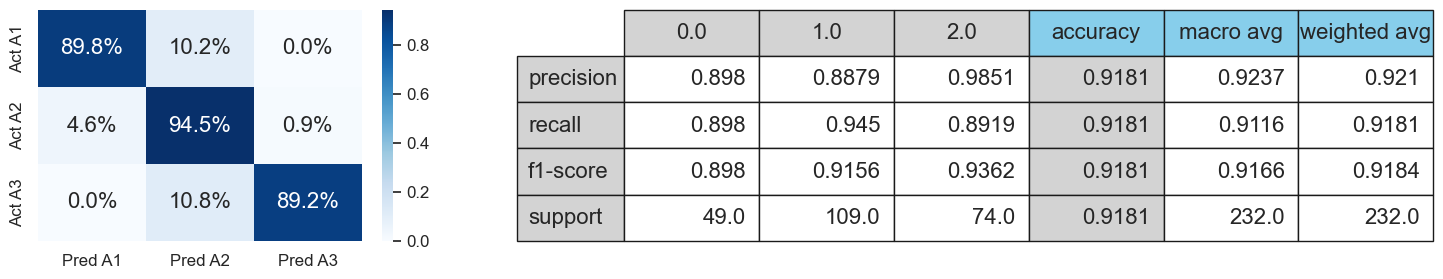

ShapeletTransformClassifier 0.8793103448275862


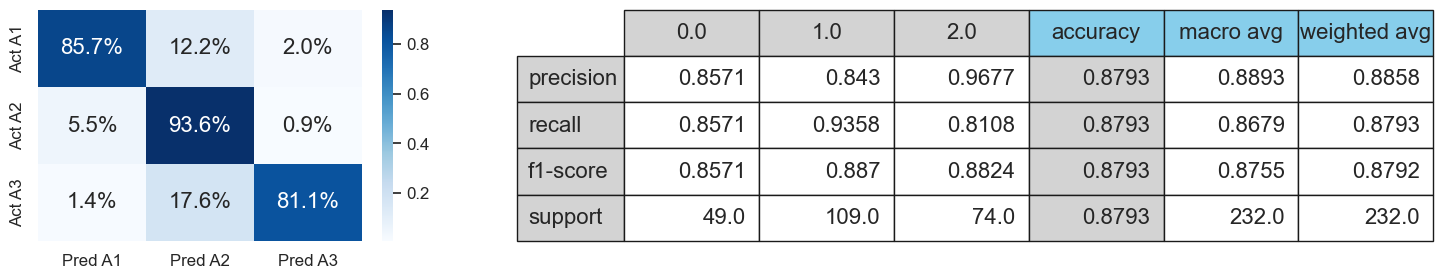

KNeighborsTimeSeriesClassifier 0.771551724137931


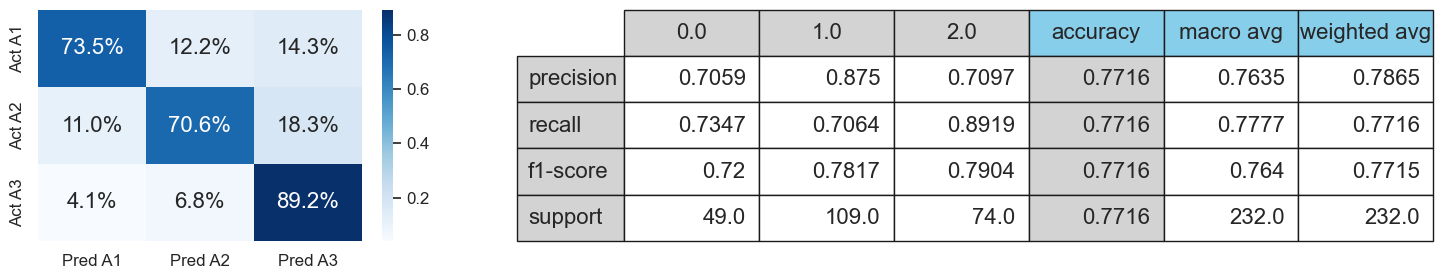

ComposableTimeSeriesForestClassifier 0.8836206896551724


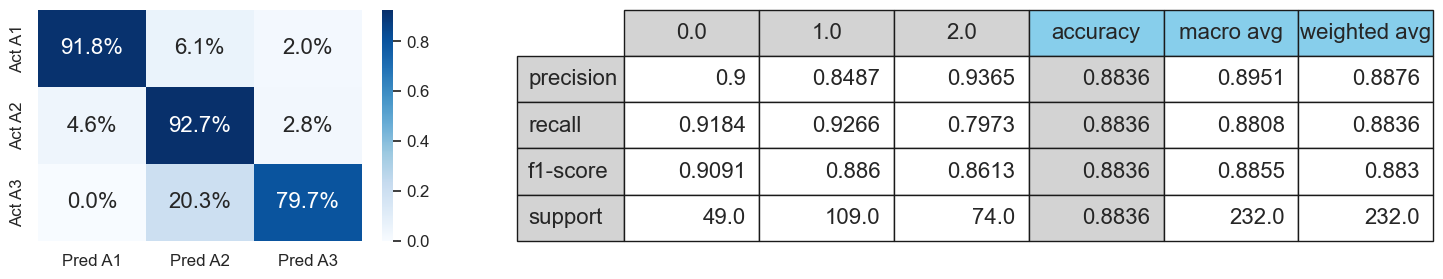

In [121]:
classify_report(sktime_clfs, X_train_nest_std, y_train, X_test_nest_std, y_test)

**MUSE - Classifier for multivariate data**

MUSE (MUltivariate Symbolic Extension).

Also known as WEASLE-MUSE: implementation of multivariate version of WEASEL, referred to as just MUSE from [1].

Overview: Input n series length m
WEASEL+MUSE is a multivariate dictionary classifier that builds a bag-of-patterns using SFA for different window lengths and learns a logistic regression classifier on this bag.

In [122]:
sktime_clfs_multi = {
    #'HIVECOTEV2': HIVECOTEV2(),
    'MUSE': MUSE(window_inc=4, use_first_order_differences=False)
}

In [123]:
df_multi.iloc[:,3]

0        Biking
1        Biking
2        Biking
3        Biking
4        Biking
         ...   
1155    Running
1156    Running
1157    Running
1158    Running
1159    Running
Name: target, Length: 1160, dtype: category
Categories (3, object): ['Biking', 'Other', 'Running']

In [124]:
x_multi = df_multi.iloc[:,0:3]
y_multi = df_multi.iloc[:,3].cat.codes

x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi, y_multi, 
                                                                            test_size=0.2, random_state=24, 
                                                                            stratify=df_multi.iloc[:,3], 
                                                                            shuffle=True)

MUSE 0.9482758620689655


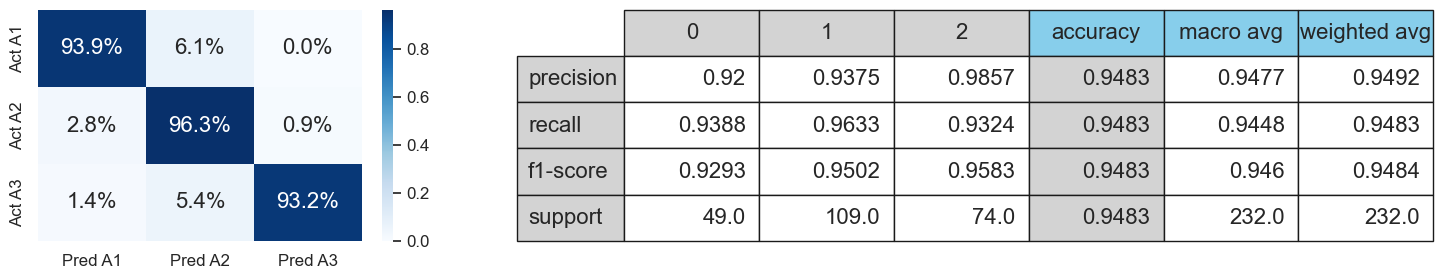

In [125]:
classify_report(sktime_clfs_multi, x_train_multi, y_train_multi, x_test_multi, y_test_multi)

This MUSE was great success! Best results by 1-2 percent. Variance seems to be %

<a id="3D"></a> <br>
### [▲](#3) 3D - SKLearn Classifiers

**Original features**

In [126]:
init_data(SEQ_START, SEQ_END, nest=False, tab=True)
X_train_tab.head()

0      1           2      3      4           5      6      7    \
0  153.0  3.863  120.400002  152.0  3.872  120.599998  153.0  3.872   
1  164.0  5.421  134.000000  164.0  5.552  133.800003  164.0  5.477   
2  161.0  6.513  124.199997  161.0  5.990  124.599998  161.0  5.981   
3  134.0  8.267  138.199997  134.0  8.276  138.199997  136.0  8.295   
4  138.0  2.715  237.600006  138.0  2.725  237.600006  139.0  2.734   

          8      9    ...         197    198    199         200    201    202  \
0  121.000000  152.0  ...  118.599998  153.0  3.798  118.599998  154.0  3.807   
1  133.800003  163.0  ...  128.800003  162.0  6.457  129.000000  163.0  7.045   
2  125.199997  161.0  ...  123.400002  175.0  6.942  122.400002  175.0  6.681   
3  138.000000  136.0  ...  137.800003  143.0  7.521  137.800003  143.0  7.455   
4  237.600006  139.0  ...  268.200012  185.0  2.538  268.600006  185.0  2.529   

          203    204    205         206  
0  118.400002  154.0  3.807  118.599998  
1  128.600006  162.0  6.774  128.000000  
2  122.000000  175.0  6.653  121.000000  
3  137.800003  144.0  7.334  137.800003  
4  269.000000  185.0  2.529  269.600006  

[5 rows x 207 columns]

In [127]:
sklearn_clfs = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}
sklearn_clfs_std = {
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SupportVectorClassifier': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SGDClassifier': SGDClassifier()
}

RandomForestClassifier 0.896551724137931


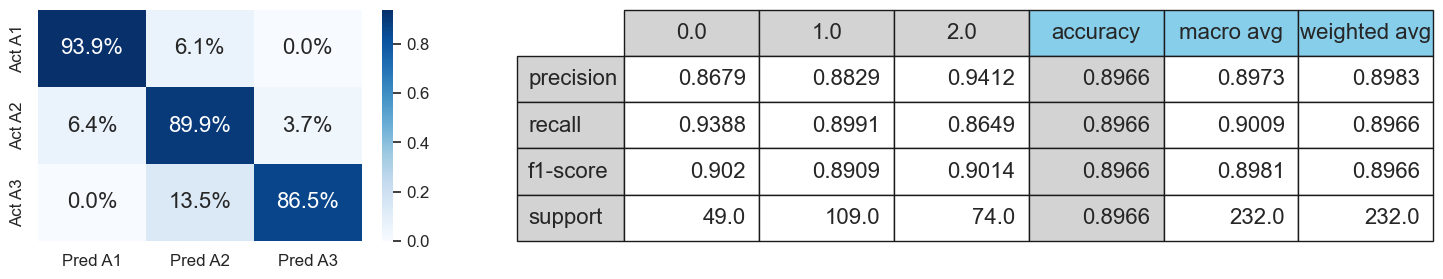

DecisionTreeClassifier 0.8577586206896551


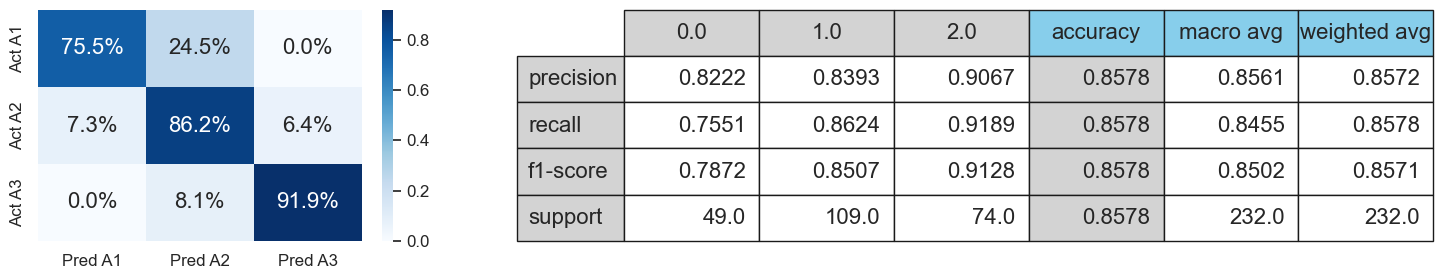

In [128]:
classify_report(sklearn_clfs, X_train_tab, y_train, X_test_tab, y_test)

**Standard features**

In [129]:
init_data(SEQ_START, SEQ_END, nest=False, tab=False, std=True)
X_train_tab_std.head()

0         1         2         3         4         5         6    \
0  0.515939 -0.268068 -0.105836  0.463403 -0.261391 -0.101702  0.506845   
1  1.047489  0.516461  0.186637  1.042852  0.590364  0.182169  1.036423   
2  0.902521  1.066337 -0.024116  0.897990  0.812429 -0.015680  0.891993   
3 -0.402193  1.949561  0.276960 -0.405771  1.971423  0.276792 -0.311595   
4 -0.208902 -0.846142  2.414600 -0.212621 -0.842916  2.414423 -0.167164   

        7         8         9    ...       197       198       199       200  \
0 -0.265472 -0.093268  0.455077  ... -0.152489  0.444786 -0.291610 -0.152880   
1  0.547697  0.182039  0.984045  ...  0.067408  0.882404  1.016649  0.071329   
2  0.803047 -0.002933  0.887869  ... -0.049008  1.514520  1.255274 -0.070957   
3  1.975429  0.272374 -0.314332  ...  0.261434 -0.041456  1.540149  0.261044   
4 -0.842037  2.414606 -0.170068  ...  3.072664  2.000762 -0.911545  3.080903   

        201       202       203       204       205       206  
0  0.488473 -0.292448 -0.157407  0.485323 -0.292568 -0.153623  
1  0.925424  1.302763  0.062485  0.872980  1.169447  0.049017  
2  1.508026  1.123438 -0.079798  1.502923  1.109823 -0.101885  
3 -0.045579  1.504751  0.260819  0.000752  1.445392  0.260281  
4  1.993528 -0.922059  3.089238  1.987494 -0.922314  3.101562  

[5 rows x 207 columns]

RidgeClassifierCV 0.7241379310344828


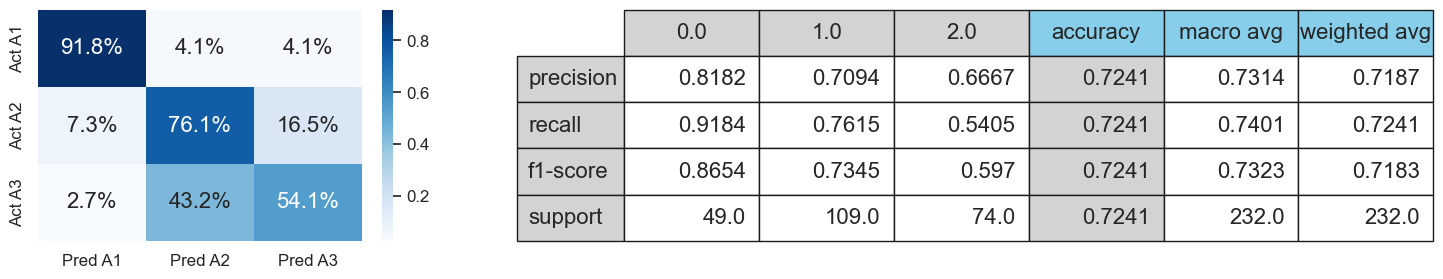

SupportVectorClassifier 0.8836206896551724


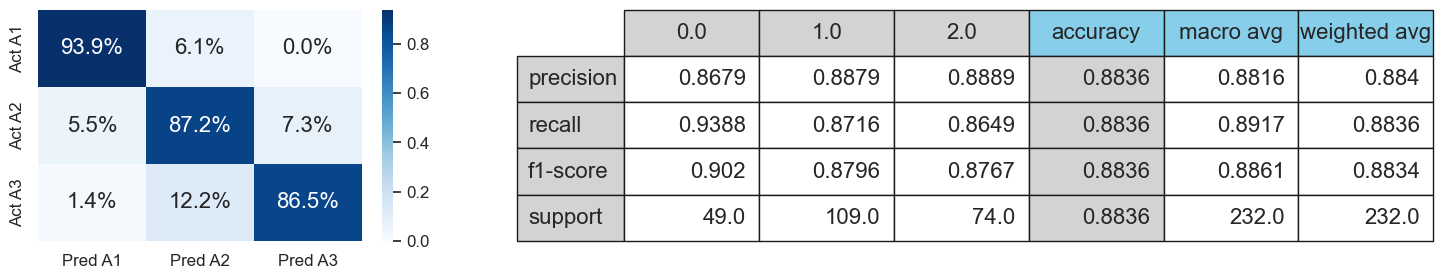

KNeighborsClassifier 0.8491379310344828


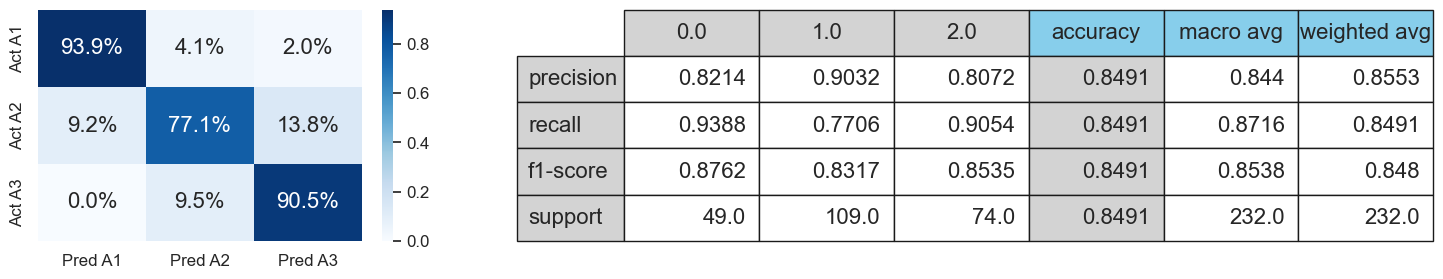

GradientBoostingClassifier 0.9181034482758621


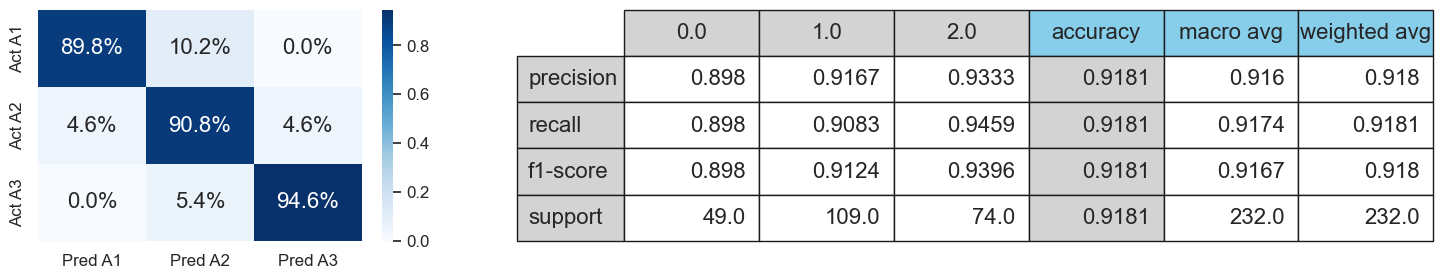

SGDClassifier 0.8189655172413793


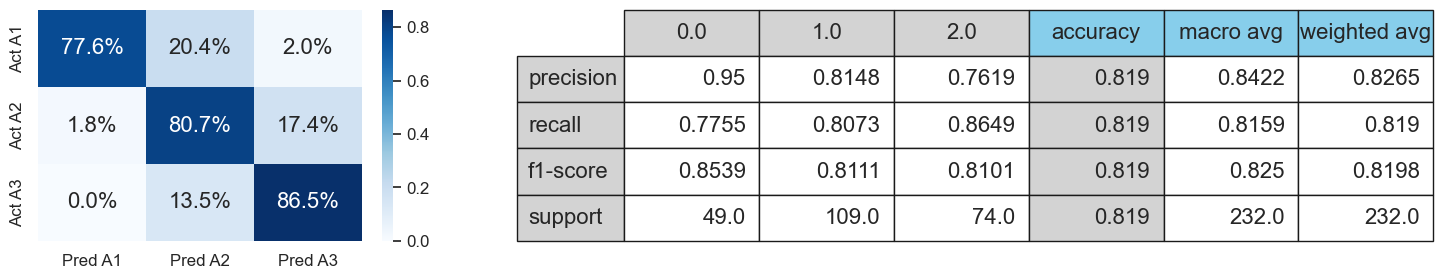

In [130]:
classify_report(sklearn_clfs_std, X_train_tab_std, y_train, X_test_tab_std, y_test)

<a id="3E"></a> <br>
### [▲](#3) 3E - Combined Classification

#### Classification

**Data variable initialization**

In [134]:
init_data(SEQ_START, SEQ_END, nest=True, tab=True, std=True)

X: (1160, 207)  y: (1160,)
Train: (928, 207) (928,) Test: (232, 207) (232,)
X: (1160, 207)  y: (1160,)
Train: (928, 207) (928,) Test: (232, 207) (232,)


<div style="display: flex; padding: 15px; background-color: skyblue; height: 60px; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 20px;"><b>Classify</b> - Data setup B</h3><br>
</div>

In [135]:
ITERS = 3
#Please Note, this may take time about ~20 min per iteration with ~500 features
results, preds = classify(sktime_clfs, 'sktime', X_train_nest_std, X_test_nest_std, y_train, y_test, results=None, preds=None, iters=ITERS)                            # Univariate sktime
results, preds = classify(sktime_clfs_multi, 'sktime-multivar', x_train_multi, x_test_multi, y_train_multi, y_test_multi, results=results, preds=preds, iters=ITERS) # Multivariate sktime
results, preds = classify(sklearn_clfs, 'sklearn-tree', X_train_tab, X_test_tab, y_train, y_test, results=results, preds=preds, iters=ITERS)                           # Sklearn tree models
results, preds = classify(sklearn_clfs_std, 'sklearn', X_train_tab_std, X_test_tab_std, y_train, y_test, results=results, preds=preds, iters=ITERS)                    # Sklearn models (std)

Processing  ➥ComposableTimeSeriesForestClassifier() : 100%|███████| 7/7 [7:41:28<00:00, 3955.47s/it]
Classification done for sktime

Processing  ➥MUSE(use_first_order_differences=False, window_inc=4) : 100%|█| 1/1 [07:01<00:00, 421.2
Classification done for sktime-multivar

Processing  ➥DecisionTreeClassifier() : 100%|█████████████████████████| 2/2 [00:03<00:00,  1.76s/it]
Classification done for sklearn-tree

Processing  ➥SGDClassifier() : 100%|██████████████████████████████████| 5/5 [00:43<00:00,  8.66s/it]
Classification done for sklearn



**Save results, scores and predictions to the file**

In [136]:
time_stamp = datetime.datetime.now().strftime("D%Y%m%d_T%H%M")
results_filepath = 'results/'
results_csv_filename = 'results_datasetup_a_' + time_stamp + '.csv'
preds_filepath = 'predictions/'
preds_csv_filename = 'preds_datasetup_a_' + time_stamp + '.csv'

In [137]:
results.to_csv(results_filepath + results_csv_filename, index=False)
preds.to_csv(preds_filepath + preds_csv_filename, index=False)

**Print result table**

In [138]:
# Read results from the csv file
results_from_csv = pd.read_csv(results_filepath + results_csv_filename)
results_from_csv = results_from_csv.replace(np.nan, 0)
# Statistics for the scores
score_col_names = create_col_names('Score_', ITERS)
results_from_csv['Score Best'] = results_from_csv[score_col_names].max(axis=1)
results_from_csv['Variance'] = results_from_csv[score_col_names].var(axis=1)
results_from_csv['Std'] = results_from_csv[score_col_names].std(axis=1)
results_from_csv['Score Avg'] = results_from_csv[score_col_names].mean(axis=1)
# Sort values
sorted_results = results_from_csv.sort_values(by='Score Best', ascending=False)
# Style setup
format_cols = ['Train(t)','Test(t)','Score_1','Score_2','Score_3','mse','f1','roc-auc','Score Best','Variance','Std','Score Avg']
sorted_results.style.background_gradient(cmap=sns.light_palette("skyblue", as_cmap=True))\
    .set_properties(subset=['Score Best'], **{'font-weight': 'bold'})\
    .format(precision=4)\
    .highlight_max(format_cols, props='color:black;background-color:skyblue;', axis=0)

<div style="display: block; padding: 15px; background-color: skyblue; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 22px;"><b>Results A</b><br>
    X: (232, 424)  y: (232,)<br>
    Train: (185, 424) (185,) Test: (47, 424) (47,)<br>
    Execution time: ~80 min<br></h3>
    <p style="font-size: 18px;">The following results are with minimum sequence length of 500 (for limit 500 the shortest sequence is 524).<br>Segments are from the interval [100-524].<br>Because we use minimum activity length as the sequence end index for all the activities, our practical equalized sequence length is 424</p>
</div>

![Results232x424_test47x424](img/results_datasetup_a.png)

<div style="display: block; padding: 15px; background-color: skyblue; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 22px;"><b>Results B</b><br>
    X: (1160, 207)  y: (1160,)<br>
    Train: (928, 207) (928,) Test: (232, 207) (232,)<br>
    Execution time: ~240 min<br></h3>
    <p style="font-size: 18px;">The following results are with minimum sequence length of 500 from the original sequences (for limit 500 the shortest sequence is 524).<br>
    Sequenced data with their varying original lengths is then segmented using 5x69 splits from the interval [100, 445], shape = (1160, 69, 3).<br>
    After flattening three dimensional (3 features) data to a single "multivariate" signal in length of 3x69, dataset is created using start index 0 and length 207, shape = (1160, 207),<br>
    and thus using the whole <i>segmented data</i> (there remains a possibility to further cut data when using  <i>init_data()</i> function)<br><br>
    <b>Note: </b>In this study project <i>segmented data</i> refers always to the "data augmentation". That means, splitting single activity to a several equal length segments instead of getting only one segment per activity</p>
</div>

![Results1160x207_test232x207](img/results_datasetup_b.png)

<div style="display: block; padding: 15px; background-color: skyblue; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 22px;"><b>Conclusions</b></h3>
    <p style="font-size: 18px">Randomness achieved tolerable or moderate level after removing some problematic activities (missing HR data etc.) and using "forward filling" (ffill) method of pandas data frame (instead of replacing missing values by zero). Estimate for variance of accuracy in sktime is 1-2%, depending on model. However e.g. ComposableTimeSeriesForestClassifier resulted 0.796 and 0.878. For Classical ML models variance is also approximately 2-8% between different executions.
    <p style="font-size: 18px">For score variance among executions we need to notice, that when having only 47 instances for test data, one misclassified case affect to the accuracy score by ~2.1 percents. Therefore, quite significant variance even ~10% is understandable and not so easy to be balanced considering very challenging dataset we are using.</p>
    <p style="font-size: 18px">Note: We use the same Train and Test data when applying `classifier.fit(X_train, Y_train)`. Score variance therefore maybe comes from the classifier's own default random state property.</p>
    <p style="font-size: 18px">Latest results are gained after replacing pandas `pd.fillna(method='ffill')` by `pd.interpolate(method='linear', direction=''both')`. That was actually the case from which we discussed in the seminar meeting.</p>
</div>

#### Misclassification analysis

In [153]:
preds_from_csv = pd.read_csv(preds_filepath + preds_csv_filename)
preds_from_csv.columns

Index(['TimeSeriesForestClassifier', 'SupervisedTimeSeriesForest',
       'RandomIntervalSpectralEnsemble', 'RandomIntervalClassifier',
       'ShapeletTransformClassifier', 'KNeighborsTimeSeriesClassifier',
       'ComposableTimeSeriesForestClassifier', 'RandomForestClassifier',
       'DecisionTreeClassifier', 'RidgeClassifierCV',
       'SupportVectorClassifier', 'KNeighborsClassifier',
       'GradientBoostingClassifier', 'SGDClassifier'],
      dtype='object')

In [154]:
column_appreviations = ['TSF','STSF','RISE','RI','ST','KNN-TS','CTSF', 
                        'RF','DT','RCV','SVC','KNN','GB','SGD']

In [156]:
preds_from_csv.columns = column_appreviations
preds_from_csv['Correct Label'] = y_test
preds_from_csv['Errors'] = 0
# Counting misclassified cases
for i in range(0, preds_from_csv.shape[0]):
    mistakes = (preds_from_csv.iloc[i,0:-1] != preds_from_csv.loc[i]['Correct Label']).sum()
    preds_from_csv.loc[i,'Errors'] = mistakes
preds_copy = preds_from_csv.sort_values('Errors', ascending=False)
preds_copy.style.background_gradient(subset='Errors', cmap=sns.light_palette("skyblue", as_cmap=True))\
                .format(precision=0)

**Model Correlation**

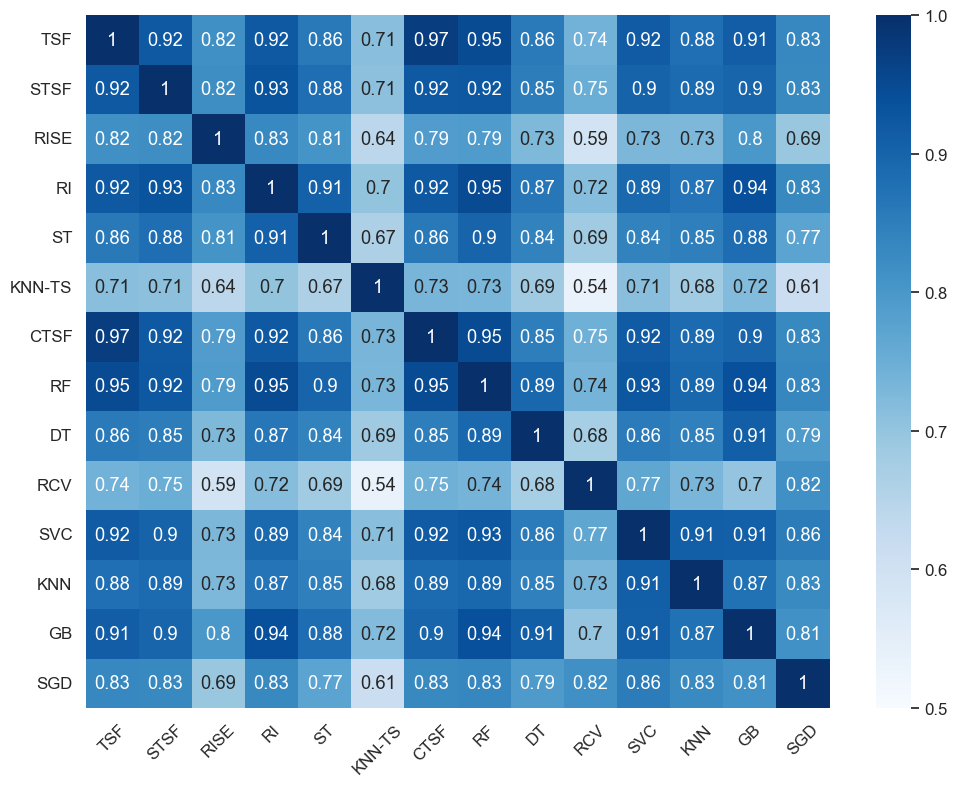

In [152]:
# Prepare correlation matrix
corr_data = preds_copy.iloc[:,0:-2]
# Plot matrix
plt.figure(figsize=(12,9))
g = sns.heatmap(corr_data.corr(), vmin=0.5, vmax=1.0, annot=True, cmap=sns.color_palette("Blues", as_cmap=True))
g.tick_params(axis='x', rotation=45)

#### Best model classification (20 segments per activity)

In [122]:
# Minimum length of sequence will be used as a segment/interval length
SEG_START = 100
SEG_LEN = 69 # int(sequence_analysis(SEQ_FILTERED)['min'])
SEG_NUM = 20

SEQ_SEGMENTED_20, SEQ_SEGMENTED_LABELS_20 = segment_data(SEQ_FILTERED, 
                                                   INDEX_DATA, 
                                                   seg_start=SEG_START, 
                                                   seg_len=SEG_LEN, 
                                                   seg_num=SEG_NUM, 
                                                   info=True)

20 ['Biking'] 20
20 ['Other'] 20
20 ['Other'] 20
20 ['Biking'] 20
20 ['Other'] 20
20 ['Biking'] 20
20 ['Running'] 20
20 ['Other'] 20
17 ['Biking'] 17
10 ['Biking'] 10
20 ['Running'] 20
20 ['Biking'] 20
20 ['Other'] 20
20 ['Biking'] 20
20 ['Biking'] 20
20 ['Biking'] 20
20 ['Other'] 20
20 ['Running'] 20
20 ['Other'] 20
20 ['Other'] 20
20 ['Biking'] 20
6 ['Running'] 6
6 ['Biking'] 6
13 ['Biking'] 13
11 ['Biking'] 11
20 ['Running'] 20
6 ['Biking'] 6
18 ['Biking'] 18
20 ['Other'] 20
20 ['Biking'] 20
20 ['Running'] 20
20 ['Biking'] 20
20 ['Other'] 20
20 ['Running'] 20
20 ['Running'] 20
20 ['Other'] 20
9 ['Biking'] 9
20 ['Biking'] 20
20 ['Other'] 20
20 ['Other'] 20
20 ['Biking'] 20
20 ['Other'] 20
20 ['Running'] 20
20 ['Biking'] 20
20 ['Other'] 20
20 ['Running'] 20
20 ['Other'] 20
20 ['Other'] 20
20 ['Running'] 20
20 ['Other'] 20
20 ['Biking'] 20
20 ['Running'] 20
20 ['Running'] 20
20 ['Other'] 20
20 ['Biking'] 20
16 ['Running'] 16
20 ['Biking'] 20
10 ['Other'] 10
20 ['Other'] 20
20 ['Biking'

In [ ]:
DATA, LABELS = (SEQ_SEGMENTED_20, SEQ_SEGMENTED_LABELS_20)
SEQ_END = SEG_LEN*3 # E.g., if SEG_LEN=69, we use 3*69=207 "multivariate" signal
SEQ_START = 0

In [ ]:
init_data(SEQ_START, SEQ_END, nest=True, tab=True, std=True)

X: (4379, 207)  y: (4379,)
Train: (3503, 207) (3503,) Test: (876, 207) (876,)
X: (4379, 207)  y: (4379,)
Train: (3503, 207) (3503,) Test: (876, 207) (876,)


In [ ]:
sktime_clfs_best = {
    'SupervisedTimeSeriesForest': SupervisedTimeSeriesForest()
}

SupervisedTimeSeriesForest 0.930365296803653


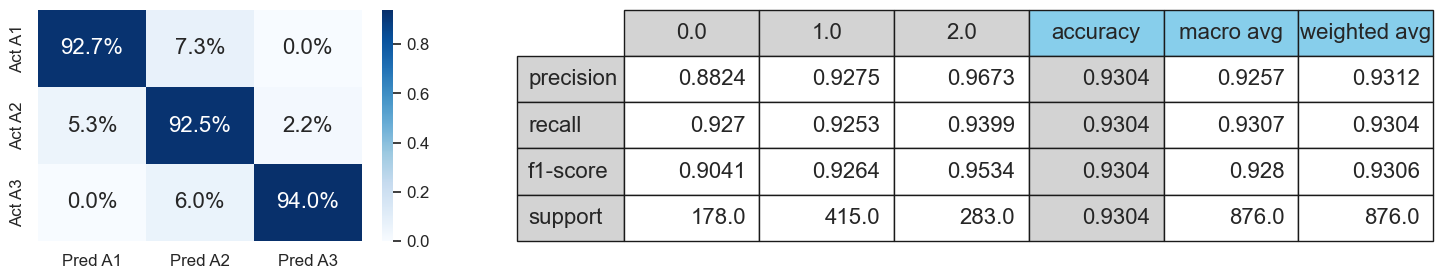

In [ ]:
classify_report(sktime_clfs_best, X_train_nest_std, y_train, X_test_nest_std, y_test)

---

<div style="display: block; padding: 15px; background-color: lightgreen; height: auto; border-radius: 5px; width: 95vw;">
    <h3 style="font-size: 26px;"><b>Execution Information</b></h3>
    <p>Works only when the whole file is executed from start to this point</p>
</div>

In [ ]:
run_end = datetime.datetime.now()
run_time = run_end - run_start
print('File execution info:')
print('Start\t', run_start)
print('End\t', run_end)
print('Runtime\t', str(run_time))

File execution info
Start	 2022-11-30 12:12:27.731692
End	 2022-11-30 12:15:01.031747
Runtime	 0:02:33.300055


---

<a id="4"></a> <br>
# [▲](#CT) 4 - Test Section

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# Some extra time series classifiers from sktime
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.feature_based import SummaryClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
# Data transformation tools from sktime
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.transformations.panel.segment import RandomIntervalSegmenter
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
# Model tuning tools
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Dataset for testing purposes
from sktime.datasets import load_basic_motions
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Metrics
from sklearn.metrics import roc_auc_score
from sktime.datasets import load_unit_test

**Reset data if needed**

In [ ]:
init_data(SEQ_START, SEQ_END, nest=False, tab=True, std=True)

<a id="4A"></a> <br>
### [▲](#4) 4A - Pipeline with data transformers

#### Time Series Forest Classifier

In [ ]:
steps = [
    ("concatenate", ColumnConcatenator()),
    # ("slope", ShapeletTransform()), # ("intervals", RandomIntervalSegmenter()), # ShapeletTransform does not finish
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]

clf_ = Pipeline(steps)
clf_.fit(X_train_nest_std, y_train)
print(clf_.score(X_test_nest_std, y_test))

0.8936170212765957


In [ ]:
clf_.steps[-1][-1].feature_importances_

array([0.00675885, 0.01265684, 0.04562501, 0.00885134, 0.00987027,
       0.03726188, 0.00655826, 0.01188898, 0.03335282, 0.00519937,
       0.01117635, 0.03608155, 0.00670318, 0.00906438, 0.02627408,
       0.00666161, 0.01228766, 0.02583167, 0.00449211, 0.01366094,
       0.03195502, 0.00692916, 0.01028151, 0.02206105, 0.00899698,
       0.00576853, 0.03483593, 0.00594219, 0.00798545, 0.02355183,
       0.00935981, 0.00463806, 0.03916987, 0.0054543 , 0.00655543,
       0.0305773 , 0.00511603, 0.01068074, 0.02572758, 0.00547444,
       0.0108547 , 0.0438892 , 0.00481348, 0.01271556, 0.03331777,
       0.00594964, 0.01180245, 0.03063233, 0.00469874, 0.01024178,
       0.04546965, 0.00658817, 0.01573477, 0.03268578, 0.00513919,
       0.01121331, 0.02395022, 0.00635947, 0.00691581, 0.04570958])

In [ ]:
len(clf_.steps[-1][-1].intervals_)

100

**Feature importance based on mean decrease in impurity (MDI)**

Feature importances are provided by the fitted attribute `feature_importances_` and they are computed as the `mean` and `standard deviation` of accumulation of the impurity decrease within each tree.

*Warning: Impurity-based feature importances can be misleading for high cardinality features (many unique values).*

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

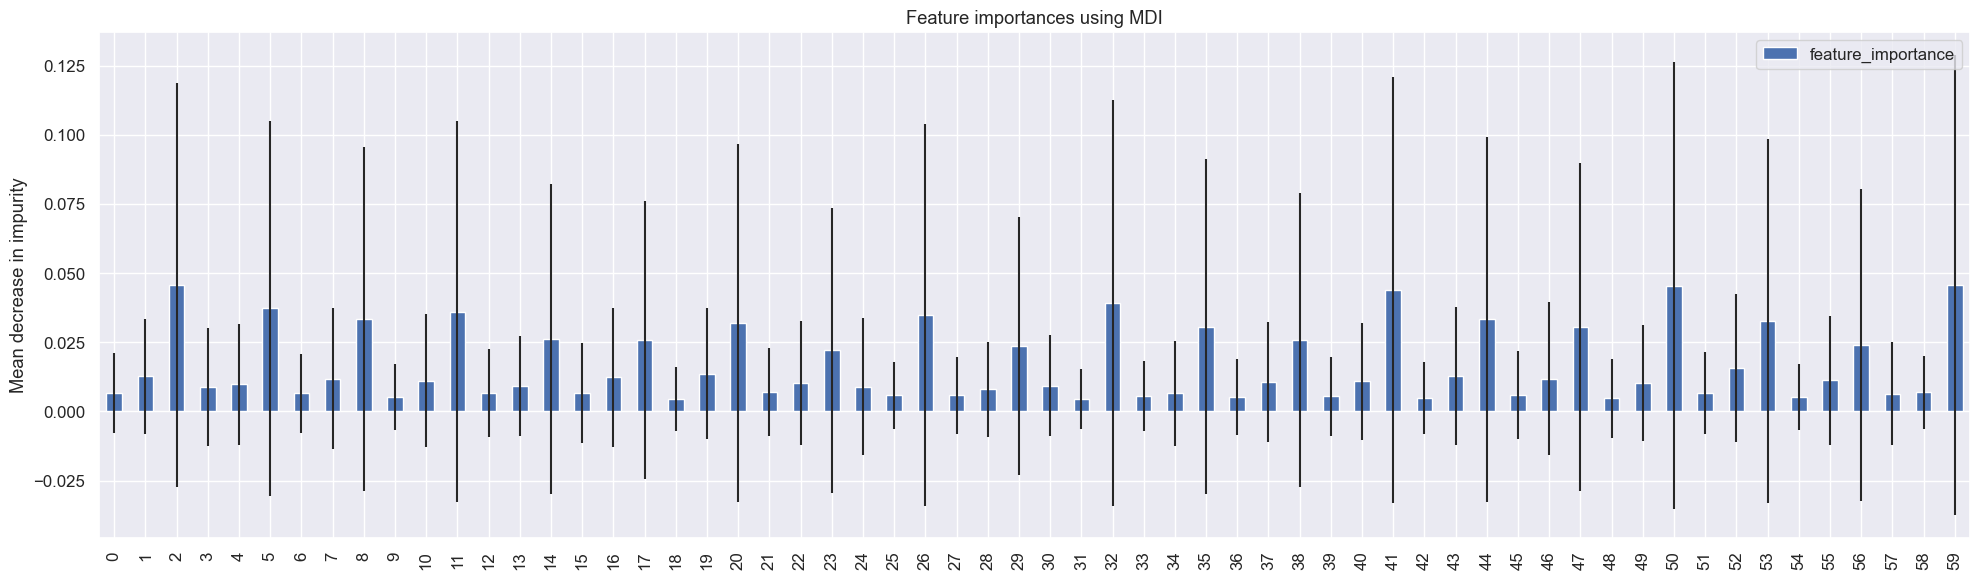

In [ ]:
std = np.std([tree.feature_importances_ for tree in clf_.steps[-1][-1].estimators_], axis=0)
feat_imps = pd.DataFrame(clf_.steps[-1][-1].feature_importances_, columns=['feature_importance'])
fig, ax = plt.subplots(figsize=(20,6))
feat_imps.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
#feat_imps.plot.bar(xlabel="time", ylabel="feature importance")

**Permutation importance**

High cardinality tolerance solution

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled [1]. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

Reference: 
* https://scikit-learn.org/stable/modules/permutation_importance.html
* https://www.kaggle.com/code/dansbecker/permutation-importance/tutorial
* https://www.programmersought.com/imgrdrct/http://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html



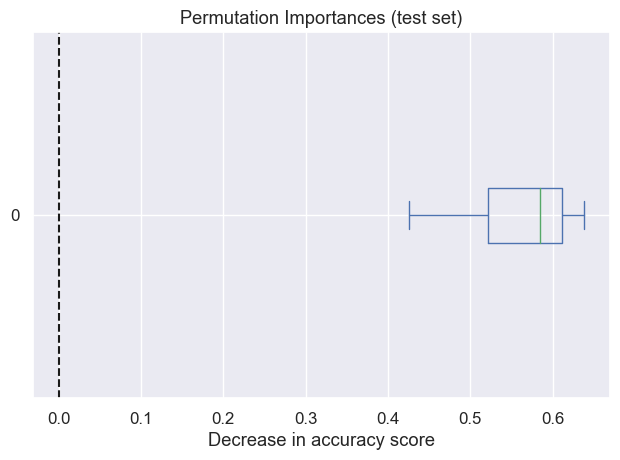

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf_, X_test_nest_std, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test_nest_std.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#### Interval Based: ComposableTimeSeriesForestClassifier

0.8723404255319149


<AxesSubplot:xlabel='time', ylabel='feature importance'>

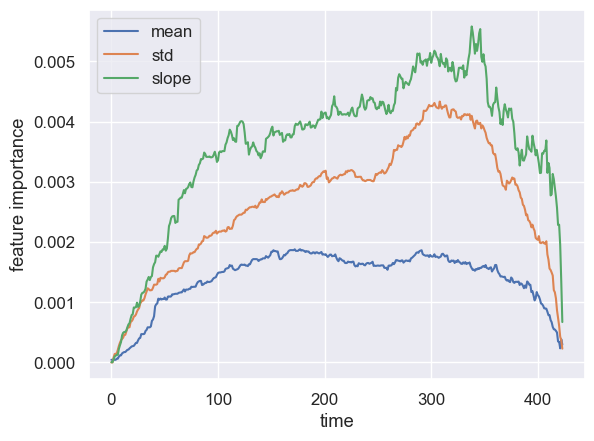

In [ ]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", ComposableTimeSeriesForestClassifier(n_estimators=100)),
]

clf_ctsf = Pipeline(steps)
clf_ctsf.fit(X_train_nest_std, y_train)
print(clf_ctsf.score(X_test_nest_std, y_test))

clf_ctsf.steps[-1][-1].feature_importances_.rename(columns={"_slope": "slope"}).plot(xlabel="time", ylabel="feature importance")

**Slope info**

In mathematics, the *slope* or *gradient of a line* is a number that describes both the *direction* and the *steepness* of the line

https://en.wikipedia.org/wiki/Slope


<a id="4B"></a> <br>
### [▲](#4) 4B - TSA in Heart Rate

#### Create sequences from the raw data

Error message for `hr_seqs = get_sequences(DATA_PATH, ENTRIES, ['HeartRate'], info=True)`

TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

In [ ]:
hr_seqs = get_sequences(DATA_PATH, ENTRIES, ['HeartRate'], info=True)

rm_index = []
len_lim = 500
hr_lim = 100

for i, s in zip(range(0,len(hr_seqs)), hr_seqs):
    hr_values = np.asarray(s[:,0], dtype=int)

    if len(s) < len_lim:
        rm_index.append(i)
    else:
        # For debug, print mean values
        #print(hr_values.mean(), spd_values.mean(), alt_values.mean())
        if hr_values.mean() <= hr_lim:
            rm_index.append(i)

print(len(rm_index), rm_index)

hr_target_filtered_idx = [index for index in TARGETS.index if index not in rm_index]
print('len() =', len(hr_target_filtered_idx), hr_target_filtered_idx)

Created 297 sequences from 297 entries
63 [2, 3, 5, 6, 7, 9, 13, 18, 19, 28, 29, 34, 37, 45, 46, 58, 61, 65, 67, 73, 89, 91, 93, 98, 105, 108, 109, 118, 119, 120, 122, 124, 131, 133, 134, 136, 138, 139, 146, 150, 159, 161, 179, 207, 208, 212, 218, 221, 226, 227, 228, 231, 232, 234, 236, 239, 248, 249, 250, 252, 272, 288, 290]
len() = 234 [0, 1, 4, 8, 10, 11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 121, 123, 125, 126, 127, 128, 129, 130, 132, 135, 137, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,

In [ ]:
idx_data = pd.DataFrame(columns=['org_index','label'])
idx_data['org_index'] = np.array(hr_target_filtered_idx)
idx_data['label'] = TARGETS['activity_name'][hr_target_filtered_idx].values

In [ ]:
hr_seqs_filtered = np.array(hr_seqs, dtype=object)[hr_target_filtered_idx]
len(hr_seqs_filtered), len(hr_target_filtered_idx)

(234, 234)

#### Sequence visualization

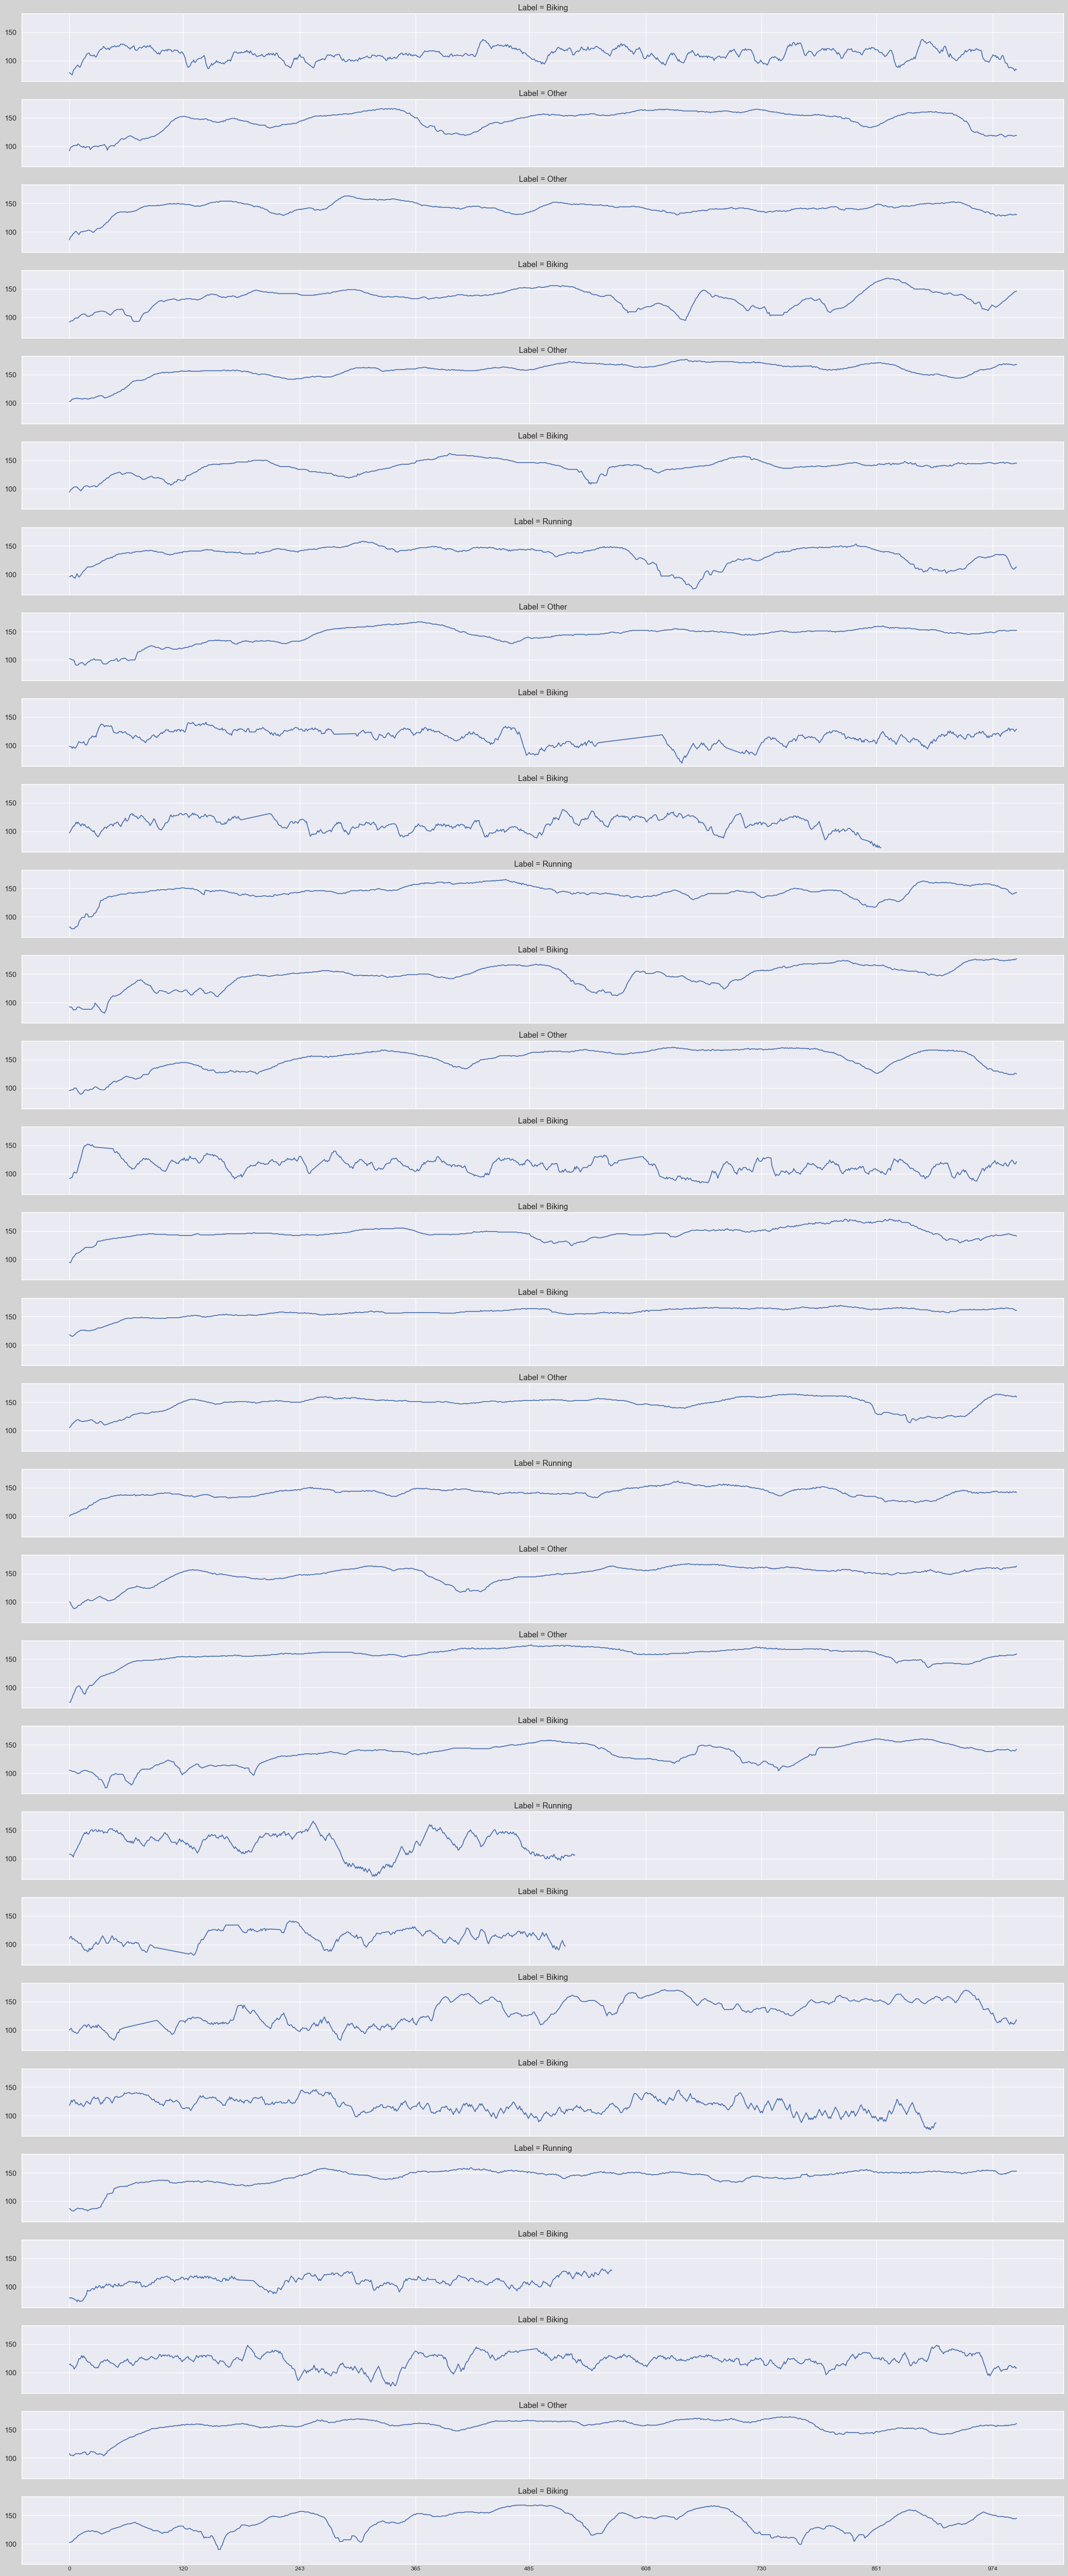

In [ ]:
N = 30
# You may try without  or with sharey and sharex combinations
fig, ax = plt.subplots(nrows=N, ncols=1, sharex=True, sharey=True, figsize=(25, N*2)) 
fig.patch.set_facecolor('lightgray')

for i, (seq, ax) in enumerate(zip(hr_seqs_filtered[0:N],fig.axes)):
    seq = seq.reshape(-1)[0:1000]
    sns.lineplot(data=seq, ax=ax).set_title("Label = " + str(idx_data['label'][i]))
    ax.tick_params(axis="x", labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        
fig.tight_layout()
plt.show()

**Comment**

This intensity difference is highly likely caused by different time interval in recording. Actually, it should be fixed.

In [ ]:
print("(" + str(hr_seqs_filtered.shape[0]) + ", ?, " + str(hr_seqs_filtered[0].shape[1]) +")" )

(234, ?, 1)


In [ ]:
sequence_analysis(hr_seqs_filtered)

count      234.000000
mean      4664.333333
std       2927.956199
min        524.000000
25%       2834.250000
50%       4452.500000
75%       5992.000000
max      19781.000000
dtype: float64

#### Create dataset from the sequences

In [ ]:
# The whole data (standard)
x_hrdata_std, y_hrdata = create_dataset(hr_seqs_filtered, idx_data, seq_start=100, seq_end=524, std=True, info=False)
# Train-Test data splits (standard)
x_hrtrain_std, x_hrtest_std, y_hrtrain, y_hrtest = train_test_split(x_hrdata_std, y_hrdata, test_size=0.2, random_state=24, stratify=y_hrdata, shuffle=True)
print('Train:', x_hrtrain_std.shape, y_hrtrain.shape, 'Test:', x_hrtest_std.shape, y_hrtest.shape)
# Nested
X_hrtrain_nest_std = from_2d_array_to_nested(x_hrtrain_std)
X_hrtest_nest_std  = from_2d_array_to_nested(x_hrtest_std)

X: (234, 424)  y: (234,)
Train: (187, 424) (187,) Test: (47, 424) (47,)


#### Time Series Classification

In [ ]:
hr_results = classify(sktime_clfs, 'sktime', X_hrtrain_nest_std, X_hrtest_nest_std, y_hrtrain, y_hrtest, results=None, iters=3)

Processing  ➥ComposableTimeSeriesForestClassifier() : 100%|████████| 7/7 [1:24:14<00:00, 722.04s/it]
Classification done for sktime



In [ ]:
score_col_names = create_col_names('Score_', 3)
hr_results['Score Best'] = hr_results[score_col_names].max(axis=1)
hr_results['Score Avg'] = hr_results[score_col_names].mean(axis=1)
hr_results.sort_values(by="Score Best", ascending=False)

Classifier    Type    Train(t)    Test(t)  \
3              RandomIntervalClassifier  sktime  214.123324  23.323147   
0            TimeSeriesForestClassifier  sktime    8.150803   2.196939   
1            SupervisedTimeSeriesForest  sktime   69.704044   5.472985   
6  ComposableTimeSeriesForestClassifier  sktime  773.839346  86.278602   
4           ShapeletTransformClassifier  sktime  275.759921  12.667850   
2        RandomIntervalSpectralEnsemble  sktime   54.826541   8.533230   
5        KNeighborsTimeSeriesClassifier  sktime    2.309067  24.081383   

    Score_1   Score_2   Score_3       mse        f1   roc-auc  Score Best  \
3  0.765957  0.744681  0.765957  0.297872  0.765957  0.871121    0.765957   
0  0.659574  0.723404  0.680851  0.340426  0.723404  0.850588    0.723404   
1  0.702128  0.702128  0.723404  0.340426  0.723404  0.847691    0.723404   
6  0.680851  0.702128  0.680851  0.361702  0.702128  0.828681    0.702128   
4  0.574468  0.574468  0.659574  0.404255  0.659574  0.760806    0.659574   
2  0.553191  0.531915  0.531915  0.446809  0.553191  0.852516    0.553191   
5  0.489362  0.489362  0.489362  0.702128  0.489362  0.600557    0.489362   

   Score Avg  
3   0.758865  
0   0.687943  
1   0.709220  
6   0.687943  
4   0.602837  
2   0.539007  
5   0.489362

In [ ]:
tabu = Tabularizer()
X_hrtrain_tab_std = tabu.fit_transform(X_hrtrain_nest_std)
X_hrtest_tab_std = tabu.fit_transform(X_hrtest_nest_std)

In [ ]:
hr_results_sklearn = classify(sklearn_clfs, 'sklearn-tree', X_hrtrain_tab_std, X_hrtest_tab_std, y_hrtrain, y_hrtest, results=None, iters=3)
hr_results_sklearn = classify(sklearn_clfs_std, 'sklearn', X_hrtrain_tab_std, X_hrtest_tab_std, y_hrtrain, y_hrtest, results=hr_results_sklearn, iters=3)

Processing  ➥DecisionTreeClassifier() : 100%|█████████████████████████| 2/2 [00:02<00:00,  1.01s/it]
Classification done for sklearn-tree

Processing  ➥SGDClassifier() : 100%|██████████████████████████████████| 5/5 [00:20<00:00,  4.18s/it]
Classification done for sklearn



In [ ]:
hr_results_sklearn['Score Best'] = hr_results_sklearn[score_col_names].max(axis=1)
hr_results_sklearn['Score Avg'] = hr_results_sklearn[score_col_names].mean(axis=1)
hr_results_sklearn.sort_values(by="Score Best", ascending=False)

Classifier          Type  Train(t)   Test(t)   Score_1  \
3     SupportVectorClassifier       sklearn  0.019394  0.013731  0.765957   
0      RandomForestClassifier  sklearn-tree  0.613349  0.041001  0.680851   
1      DecisionTreeClassifier  sklearn-tree  0.079337  0.010971  0.617021   
4        KNeighborsClassifier       sklearn  0.013525  0.182162  0.595745   
6               SGDClassifier       sklearn  0.028435  0.011965  0.595745   
5  GradientBoostingClassifier       sklearn  6.017785  0.009974  0.510638   
2           RidgeClassifierCV       sklearn  0.051344  0.009561  0.510638   

    Score_2   Score_3       mse        f1   roc-auc  Score Best  Score Avg  
3  0.765957  0.765957  0.297872  0.765957       NaN    0.765957   0.765957  
0  0.680851  0.723404  0.340426  0.723404  0.809408    0.723404   0.695035  
1  0.595745  0.574468  0.510638  0.617021  0.683446    0.617021   0.595745  
4  0.595745  0.595745  0.531915  0.595745       NaN    0.595745   0.595745  
6  0.468085  0.531915  0.595745  0.595745       NaN    0.595745   0.531915  
5  0.510638  0.531915  0.595745  0.531915       NaN    0.531915   0.517730  
2  0.510638  0.510638  0.553191  0.510638       NaN    0.510638   0.510638

<a id="4C"></a> <br>
### [▲](#4) 4C - Hyperparameter tuning test for single models

In [ ]:
# Gets the model and parameters
svm_clf = SVC(probability=True)
param_grid = {'C': [0.5, 1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0005],
              'kernel': ['poly', 'rbf', 'sigmoid','linear']}

# Grid Search cross-validation settings
clf_search = GridSearchCV(estimator=svm_clf,
                              verbose=1,
                              param_grid=param_grid,
                              cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))


# Fit the data with different random splits
print("\033[1mGridSearchCV settings\033[0m\n" + str(clf_search) + "\n")
clf_search.fit(X_train_tab_std, y_train)
svm_best = clf_search.best_estimator_
y_pred = svm_best.predict(X_test_tab_std)
y_pred_proba = svm_best.predict_proba(X_test_tab_std)
# Accuracy and F1 scores
acc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
# Print some scores
print("➥ ITER(1): acc: %s, mse: %s f1: %s ▼"%(acc, mse, f1))

GridSearchCV settings
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0005],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             verbose=1)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
➥ ITER(1): acc: 0.8936170212765957, mse: 0.10638297872340426 f1: 0.8936170212765957 ▼


In [ ]:
clf_search.best_params_

{'C': 10, 'gamma': 0.0005, 'kernel': 'rbf'}

In [ ]:
y_pred_proba

array([[9.75798619e-01, 1.74256396e-02, 6.77574178e-03],
       [3.31513631e-03, 9.87731966e-01, 8.95289758e-03],
       [9.60811267e-01, 3.35602288e-02, 5.62850394e-03],
       [7.63520538e-03, 6.15365874e-01, 3.76998920e-01],
       [7.55577080e-03, 1.35733049e-01, 8.56711180e-01],
       [1.38030391e-02, 9.82983785e-01, 3.21317562e-03],
       [2.13679613e-02, 4.98175548e-02, 9.28814484e-01],
       [2.56119699e-03, 9.83373949e-01, 1.40648536e-02],
       [9.86200541e-01, 8.85072225e-03, 4.94873641e-03],
       [8.53435080e-01, 1.20367395e-01, 2.61975247e-02],
       [1.34065982e-02, 9.52482702e-01, 3.41106998e-02],
       [2.35696118e-02, 1.08676547e-01, 8.67753841e-01],
       [6.88191157e-03, 9.32234973e-01, 6.08831151e-02],
       [5.59555502e-03, 9.31308668e-01, 6.30957774e-02],
       [1.02189572e-02, 7.06473665e-01, 2.83307378e-01],
       [4.83115434e-03, 7.15384599e-02, 9.23630386e-01],
       [9.25472661e-04, 3.65180440e-01, 6.33894088e-01],
       [8.57016805e-01, 1.29012

<a id="4D"></a> <br>
### [▲](#4) 4D - ROC AUC score for multiclass classification**

Another commonly used metric in binary classification is the Area Under the Receiver Operating Characteristic Curve (ROC AUC or AUROC). It quantifies the model’s ability to distinguish between each class. The metric is only used with classifiers that can generate class membership probabilities.

- This ROC-AUC score is already inserted to the main classification function `classify()` of the file.
- We left here space yet for ROC-AUC visualization tests

<a id="4E"></a> <br>
### [▲](#4) 4E - Data selection function

```python
TODO: Write a function that will select best activities from the dataset
    1. Define measures to determine high quality activity for each category
    2. Select 25-30 activities for each category
```

<a id="4F"></a> <br>
### [▲](#4) 4F - Column based classification (Tests for column ensemble)

Pseudocode for column based classification

```python
dataset = GetData(hearrate, speed, altitude)

for activities in dataset:
    
    do: Filter activities by category (Running, Biking, Other)
    
    for each category:
        do: initialize empty data frames
        HR = dataframe_HR
        SPD = dataframe_SPD
        ALT = dataframe_ALT
        
        for each activity in category:
            do: Combine feature time series from activity to corresponding data frame (columnwise => HR, SPD, ALT) 
                
        for (HR, SPD, ALT):
            do: Transform feature dataframes from 2d to nested
            do or: combine nested features as a dimensions to the single dataframe
```

**Column Ensemble Classifier**

In [ ]:
'''
from sktime.classification.dictionary_based import ContractableBOSS
from sktime.classification.interval_based import CanonicalIntervalForest
from sktime.datasets import load_basic_motions

X_train, y_train = load_basic_motions(split="train")
X_test, y_test = load_basic_motions(split="test")

cboss = ContractableBOSS(
    n_parameter_samples=4, max_ensemble_size=2, random_state=0
)
cif = CanonicalIntervalForest(
    n_estimators=2, n_intervals=4, att_subsample_size=4, random_state=0
)

estimators = [("cBOSS", cboss, 5), ("CIF", cif, [3, 4])]

col_ens = ColumnEnsembleClassifier(estimators=estimators)
col_ens.fit(X_train, y_train)

y_pred = col_ens.predict(X_test)
print(name, accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
plot_confmatrix(y_test, y_pred)
'''

'\nfrom sktime.classification.dictionary_based import ContractableBOSS\nfrom sktime.classification.interval_based import CanonicalIntervalForest\nfrom sktime.datasets import load_basic_motions\n\nX_train, y_train = load_basic_motions(split="train")\nX_test, y_test = load_basic_motions(split="test")\n\ncboss = ContractableBOSS(\n    n_parameter_samples=4, max_ensemble_size=2, random_state=0\n)\ncif = CanonicalIntervalForest(\n    n_estimators=2, n_intervals=4, att_subsample_size=4, random_state=0\n)\n\nestimators = [("cBOSS", cboss, 5), ("CIF", cif, [3, 4])]\n\ncol_ens = ColumnEnsembleClassifier(estimators=estimators)\ncol_ens.fit(X_train, y_train)\n\ny_pred = col_ens.predict(X_test)\nprint(name, accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, y_pred, digits=3))\nplot_confmatrix(y_test, y_pred)\n'

**NOTE:** Here we need different type of data

In [ ]:
'''
clf = ColumnEnsembleClassifier( estimators=[
                                    ("STSF", SupervisedTimeSeriesForest(), [0]),  # column 1
                                    ("TSFC", TimeSeriesForestClassifier(n_estimators=200), [1]),      # column ...
                                    ("RISE", RandomIntervalSpectralEnsemble(n_estimators=200), [2]), # column n
                                ])
clf.fit(X_train_nest, y_train)

y_pred = clf.predict(X_test_nest)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
plot_confmatrix(y_test, y_pred)
'''

'\nclf = ColumnEnsembleClassifier( estimators=[\n                                    ("STSF", SupervisedTimeSeriesForest(), [0]),  # column 1\n                                    ("TSFC", TimeSeriesForestClassifier(n_estimators=200), [1]),      # column ...\n                                    ("RISE", RandomIntervalSpectralEnsemble(n_estimators=200), [2]), # column n\n                                ])\nclf.fit(X_train_nest, y_train)\n\ny_pred = clf.predict(X_test_nest)\nprint(accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, y_pred, digits=3))\nplot_confmatrix(y_test, y_pred)\n'

---

<a id="5"></a> <br>
# [▲](#CT) 5 - Code ARCHIVE

<a id="5A"></a> <br>
### [▲](#5) 5A - Data split function (stratified y)

```python
def create_dataset_splits(sequences, targets, seq_len, std=False, info=True):
    print(len(targets))
    #targets.reset_index(drop=True, inplace=True)
    target = targets.label.astype('category').cat.codes
    # TODO: data segmentation
    # TODO: Construct stratified train/test target distribution
    # Step 1: Get indexes by activities
    run_index = targets.loc[targets['label']=='Running'].index.values.tolist()
    bike_index = targets.loc[targets['label']=='Biking'].index.values.tolist()
    oth_index = targets.loc[targets['label']=='Other'].index.values.tolist()
    # Step 2: Define train/test split size for each group
    run_train = int(len(run_index) * 0.8)
    run_test = len(run_index) - run_train
    bike_train = int(len(bike_index) * 0.8)
    bike_test = len(bike_index) - bike_train
    oth_train = int(len(oth_index) * 0.8)
    oth_test = len(oth_index) - oth_train
    # Step 3: Get actual data by indexes for train and test parts
    run_train_data = sequences[run_index[:run_train]]
    bike_train_data = sequences[bike_index[:bike_train]]
    oth_train_data = sequences[oth_index[:oth_train]]
    run_test_data = sequences[run_index[-run_test:]]
    bike_test_data = sequences[bike_index[-bike_test:]]
    oth_test_data = sequences[oth_index[-oth_test:]]
    # Step 4: Combine data
    train_seqs = np.hstack((run_train_data, bike_train_data, oth_train_data))
    test_seqs = np.hstack((run_test_data, bike_test_data, oth_test_data))
    print(train_seqs.shape)
    print(test_seqs.shape)
    
    train_index = np.hstack((run_index[:run_train], bike_index[:bike_train], oth_index[:oth_train]))
    test_index = np.hstack((run_index[run_train:], bike_index[bike_train:], oth_index[oth_train:]))
    
    if info: print("Running activity indexes")
    if info: print("Train: ", run_index[:run_train])
    if info: print("Test: ", run_index[run_train:])
    
    # Initialize X,y data
    x_train = np.zeros((len(train_index),seq_len))
    y_train = np.zeros(len(train_index))
    
    x_test = np.zeros((len(test_index), seq_len))
    y_test = np.zeros(len(test_index))
    
    print("\nIndex/Sequence length validity check: ", len(train_index), len(train_seqs))
    k = 0;
    for i, s in zip(train_index, train_seqs):
        if info: print(i,s.shape)
        # Sequence manipulation
        signal = s.reshape(-1,1)
        signal = np.squeeze(np.asarray(signal))
        signal = signal[:seq_len]
        #signal = signal[:segment_len]
        #print(signal.shape)
        x_train[k] = signal
        y_train[k] = target[i]
        k+=1
    
    print("\nIndex/Sequence length validity check: ", len(test_index), len(test_seqs))
    k = 0
    for i, s in zip(test_index, test_seqs):
        if info: print(i,s.shape)
        # Sequence manipulation
        signal = s.reshape(-1,1)
        signal = np.squeeze(np.asarray(signal))
        signal = signal[:seq_len]
        #print(signal.shape)
        x_test[k] = signal
        y_test[k] = target[i]
        k+=1
    
    if std:
        x_train = StandardScaler().fit_transform(x_train)
        x_test = StandardScaler().fit_transform(x_test)
        
    return x_train, x_test, y_train, y_test
```

<a id="5B"></a> <br>
### [▲](#5) 5B - Plot Functions

```python
import plotly.graph_objects as go

fig = go.Figure( data = [go.Surface(z=DF_cut.values)])
fig.update_layout(title='Title', autosize=False, width=1000, height=750, margin=dict(l=65,r=50,b=65,t=90))
fig.show()
```

```python
def plot_mean_by_condition(data, condition,title):

    M=data[feat][condition].mean()[1:]
    V=data[feat][condition].var()[1:]

    sns.set_theme()

    fig=plt.figure(figsize=(20,5))
    plt.title(title)
    plt.plot(M,linewidth = 9, label = 'Среднее')
    plt.fill_between(M.index,M-np.sqrt(V),M+np.sqrt(V),color='grey',label = 'разброс в СКО')
    plt.legend()
    plt.tight_layout()
    fig=plt.figure(figsize=(20,5))
    plt.plot(DF[feat][condition].T)
    plt.tight_layout()

```